<h1 style="text-align:center;">UIDAI DATA HACKATHON 2026</h2>

**VANATHY ABHINAV**

B.Sc Computer Science specialization in Data science

***Vellore Institute of Technology, TamilNadu***

# Problem Statement


UIDAI is conducting a Data hackathon 2026 for students to peruse Aadhar data and comeup with insights on the data itself.

The problem statement for the hackathon states as follows;

**Identify meaningful patterns, trends, anomalies, or predictive indicators and translate them into clear insights or solution frameworks that can support informed decision-making and system improvements.**

We are proposing to pre-process, analyze and use this data to predict forecasting trends.

In [2]:
import pandas as pd
import glob
import os
import warnings
from pathlib import Path
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

enrolmentpath = r"/content/Learning/Data/api_data_aadhar_enrolment"
demograpicpath = r"/content/Learning/Data/api_data_aadhar_demographic"
biometricpath = r"/content/Learning/Data/api_data_aadhar_biometric"


# DataSet Used

There are 3 different types of Datasets Available:
1> ENROLMENT DATA
2> DEMOGRAPHIC DATA
3> BIOMETRIC DATA

The datasets among these groups contains details of the enrolment in different states, Post code, Age Group, Demographics of the age group and Biometrc details of the different age group. For data cleansing and analysis purposes, we have used all the columns provided.


In [3]:
# Load all enrollment CSVs
enrollment_files = glob.glob(enrolmentpath + r"/*.csv")
print(f" Following {len(enrollment_files)} enrollment files are found:")
for f in enrollment_files:
    print(f"   - {os.path.basename(f)}")

enrol = pd.concat(
    [pd.read_csv(f) for f in enrollment_files],
    ignore_index=True
)
print(f"\n Success: Enrollment DataFrame created: {enrol.shape[0]:,} rows × {enrol.shape[1]} columns")

 Following 3 enrollment files are found:
   - api_data_aadhar_enrolment_1000000_1006029.csv
   - api_data_aadhar_enrolment_0_500000.csv
   - api_data_aadhar_enrolment_500000_1000000.csv

 Success: Enrollment DataFrame created: 1,006,029 rows × 7 columns


In [4]:
# Load all enrollment CSVs
demographic_files = glob.glob(demograpicpath + r"/*.csv")
print(f"Following {len(demographic_files)} demographic files are found:")
for f in demographic_files:
    print(f"   - {os.path.basename(f)}")

demographic = pd.concat(
    [pd.read_csv(f) for f in demographic_files],
    ignore_index=True
)
print(f"\n Success: Demographic DataFrame created: {demographic.shape[0]:,} rows × {demographic.shape[1]} columns")

Following 5 demographic files are found:
   - api_data_aadhar_demographic_1500000_2000000.csv
   - api_data_aadhar_demographic_1000000_1500000.csv
   - api_data_aadhar_demographic_2000000_2071700.csv
   - api_data_aadhar_demographic_500000_1000000.csv
   - api_data_aadhar_demographic_0_500000.csv

 Success: Demographic DataFrame created: 2,071,700 rows × 6 columns


In [5]:
# Load all biometric CSVs
biometric_files = glob.glob(biometricpath + r"/*.csv")
print(f"Following {len(biometric_files)} biometric files are found:")
for f in biometric_files:
    print(f"   - {os.path.basename(f)}")

bio = pd.concat(
    [pd.read_csv(f) for f in biometric_files],
    ignore_index=True
)
print(f"\nSuccess: Biometric DataFrame created: {bio.shape[0]:,} rows × {bio.shape[1]} columns")

Following 4 biometric files are found:
   - api_data_aadhar_biometric_1000000_1500000.csv
   - api_data_aadhar_biometric_0_500000.csv
   - api_data_aadhar_biometric_500000_1000000.csv
   - api_data_aadhar_biometric_1500000_1861108.csv

Success: Biometric DataFrame created: 1,861,108 rows × 6 columns


# Methodology

The project commenced with the acquisition and consolidation of three distinct Aadhaar-related datasets: Enrolment, Demographic, and Biometric data. These datasets, initially distributed across multiple CSV files within a cloned GitHub repository, were programmatically loaded and concatenated into single, comprehensive pandas DataFrames. This initial step ensured all relevant information for each data type was centrally accessible for subsequent processing and analysis, providing a unified view of the Aadhaar data.

Following data acquisition, a crucial data cleansing and preprocessing phase was undertaken. This involved standardizing categorical variables, particularly the 'state' and 'district' columns, by stripping whitespace and converting text to title case to eliminate inconsistencies. Common spelling variations and aliases for states (e.g., 'Orissa' to 'Odisha', 'Puducherry' to 'Pondicherry') were uniformly corrected. Additionally, specific erroneous entries like '100000' in the 'state' column were identified and removed, ensuring data integrity. The date columns across all datasets were converted to datetime objects, and a 'month_year' feature was extracted to facilitate time-series analysis.

With clean data, the methodology proceeded to an extensive exploratory data analysis, encompassing both univariate and bivariate analyses. Univariate analysis focused on understanding the distribution of individual variables such as state and age groups within each dataset, utilizing count plots and bar plots to visualize key patterns like leading states in enrolment or demographic population. Bivariate analysis delved into relationships between variables, examining how different age groups are represented across states and districts, employing grouped bar charts and line plots to illustrate these connections and highlight geographic concentrations of Aadhaar activity.

Finally, a multivariate analysis was performed to identify monthly trends and generate future forecasts. This involved aggregating the cleaned data by 'month_year' for each age group across all three datasets. Linear regression models were then applied to this aggregated time-series data to predict 6-month forecasts for enrolment, demographic population, and biometric submissions. The results were visualized alongside historical data, providing insights into anticipated changes and growth trajectories, though acknowledging the inherent linearity assumption of the models used.



# Data Cleansing

The data cleansing process involved several key steps for each of the three datasets (Enrolment, Demographic, and Biometric) to ensure consistency and accuracy:

**Standardizing 'state' and 'district' columns:** For all three datasets, the 'state' column underwent a cleaning process. This included stripping any leading or trailing whitespace and converting the text to title case (e.g., 'karnataka' became 'Karnataka') to ensure uniformity. Similar actions were taken for the 'district' column in the biometric dataset, and specific character replacements were applied to 'district' columns across all datasets to handle inconsistencies (e.g., 'Medchal?Malkajgiri' to 'Medchal-Malkajgiri', and replacing various special characters or typos).

**Correcting State Name Variations:** A comprehensive set of replacements was applied to the 'state' column to consolidate different spellings or aliases into a single, standard name. For example, 'Orissa' was standardized to 'Odisha', multiple variations of 'West Bengal' were unified, and 'Puducherry' was replaced with 'Pondicherry'. This step was crucial for accurate aggregation and analysis across states.

**Handling Erroneous Entries:** Specific problematic entries, such as '100000' found in the 'state' column of both enrolment and demographic datasets, were identified and removed, as these were clearly not valid state names and could distort the analysis.

**Date Column Conversion:** For all datasets, the 'date' column, which was initially stored as an object (string), was converted into a proper datetime object using a specified format ('%d-%m-%Y'). This conversion is essential for any time-series analysis and for extracting temporal features like 'month_year', which was subsequently added to each DataFrame for monthly trend analysis.



# Data Processing and Cleansing of the Enrolment Dataset

### View the first & Last 5 rows of the Enrolment dataset

In [6]:
enrol.head(5)

date      state district  pincode  age_0_5  age_5_17  age_18_greater
0  31-12-2025  Karnataka    Bidar   585330        2         3               0
1  31-12-2025  Karnataka    Bidar   585402        6         0               0
2  31-12-2025  Karnataka    Bidar   585413        1         0               0
3  31-12-2025  Karnataka    Bidar   585418        1         2               0
4  31-12-2025  Karnataka    Bidar   585421        4         3               0

In [7]:
enrol.tail(5)

date      state   district  pincode  age_0_5  age_5_17  \
1006024  31-12-2025  Telangana  Hyderabad   500045        4         5   
1006025  31-12-2025  Telangana  Hyderabad   500057        0         2   
1006026  31-12-2025  Telangana  Hyderabad   500061        4         2   
1006027  31-12-2025  Telangana  Hyderabad   500062        1         4   
1006028  31-12-2025  Telangana  Hyderabad   500095        0         1   

         age_18_greater  
1006024               1  
1006025               0  
1006026               0  
1006027               0  
1006028               0

## Check data types and number of non-null values for each column

In [8]:
enrol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [9]:
enrol.shape

(1006029, 7)

In [10]:
enrol.isna().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [11]:
enrol.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

**Observation : No null values present in the data**

### Statistical Summary of Data

In [12]:
enrol.describe().T

count           mean            std       min       25%  \
pincode         1006029.0  518641.454930  205635.970416  100000.0  363641.0   
age_0_5         1006029.0       3.525709      17.538511       0.0       1.0   
age_5_17        1006029.0       1.710074      14.369625       0.0       0.0   
age_18_greater  1006029.0       0.167344       3.220525       0.0       0.0   

                     50%       75%       max  
pincode         517417.0  700104.0  855456.0  
age_0_5              2.0       3.0    2688.0  
age_5_17             0.0       1.0    1812.0  
age_18_greater       0.0       0.0     855.0

### Unique Values

In [16]:
ColumnNames = ["date", "state", "district", "pincode", "age_0_5", "age_5_17", "age_18_greater"]
for temp in ColumnNames:
     # print("----",temp,"--------")
      uniquevalues = enrol[temp].unique()
      #print(uniquevalues)

## Data Cleansing

In [17]:
enrol['state'] = enrol['state'].str.strip().str.title()
#print(enrol['state'].unique())

In [18]:
enrol['state'] = enrol['state'].replace('West  Bengal', 'West Bengal')
enrol['state'] = enrol['state'].replace('West Bangal', 'West Bengal')
enrol['state'] = enrol['state'].replace('Westbengal', 'West Bengal')
enrol['state'] = enrol['state'].replace('Orissa', 'Odisha')
enrol['state'] = enrol['state'].replace('Puducherry', 'Pondicherry')
enrol['state'] = enrol['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
enrol['state'] = enrol['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
enrol['state'] = enrol['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
enrol['state'] = enrol['state'].replace('Daman & Diu', 'Daman And Diu')
enrol['state'] = enrol['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
# drop all rows that contain '100000'
enrol = enrol.drop(enrol[enrol['state'] == '100000'].index)

#print(enrol['state'].unique())




In [19]:
# Find all characters that aren't alphanumeric or spaces
enrol['district'] = enrol['district'].replace('?', 'unknown')
enrol['district'] = enrol['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Medchalâ\x88\x92malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Medchal?malkajgiri', 'Medchal-Malkajgiri')
enrol['district'] = enrol['district'].replace('Deeg\xa0', 'Deeg')


In [20]:
enrol.shape

(1006007, 7)

# Data Processing and cleansing of the Demographic Dataset

### View the first & Last 5 rows of the Demographic dataset

In [21]:
demographic.head(5)

date      state district  pincode  demo_age_5_17  demo_age_17_
0  18-11-2025  Karnataka    Hasan   573118              0             2
1  18-11-2025  Karnataka    Hasan   573124              1             3
2  18-11-2025  Karnataka    Hasan   573150              0             2
3  18-11-2025  Karnataka   Hassan   573113              0             1
4  18-11-2025  Karnataka   Hassan   573120              1             4

In [22]:
demographic.tail(5)

date        state district  pincode  demo_age_5_17  \
2071695  19-09-2025  Maharashtra   Satara   415212              0   
2071696  19-09-2025  Maharashtra   Satara   415312              0   
2071697  19-09-2025  Maharashtra   Satara   415510              0   
2071698  19-09-2025  Maharashtra   Satara   415511              0   
2071699  19-09-2025  Maharashtra   Satara   415516              0   

         demo_age_17_  
2071695             1  
2071696             5  
2071697             3  
2071698            10  
2071699             3

## Check data types and number of non-null values for each column

In [ ]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [23]:
demographic.shape

(2071700, 6)

In [24]:
demographic.isna().sum()

date             0
state            0
district         0
pincode          0
demo_age_5_17    0
demo_age_17_     0
dtype: int64

***Observation : No null values present in the data***

### Statistical Summary of Data

In [25]:
demographic.describe().T

count           mean            std       min       25%  \
pincode        2071700.0  527831.782277  197293.323331  100000.0  396469.0   
demo_age_5_17  2071700.0       2.347552      14.903554       0.0       0.0   
demo_age_17_   2071700.0      21.447006     125.249766       0.0       2.0   

                    50%       75%       max  
pincode        524322.0  695507.0  855456.0  
demo_age_5_17       1.0       2.0    2690.0  
demo_age_17_        6.0      15.0   16166.0

### Unique Values

In [26]:
ColumnNames = ["date", "state", "district", "pincode", "demo_age_5_17", "demo_age_17_"]
for temp in ColumnNames:
      #print("----",temp,"--------")
      demouniquevalues = demographic[temp].unique()
      #print(demouniquevalues)

## Data Cleansing

In [27]:
demographic['state'] = demographic['state'].str.strip().str.title()
#print(demographic['state'].unique())

In [28]:
demographic['state'] = demographic['state'].replace('West  Bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('West Bangal', 'West Bengal')
demographic['state'] = demographic['state'].replace('Westbengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('Westbengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('WEST BENGAL', 'West Bengal')
demographic['state'] = demographic['state'].replace('WESTBENGAL', 'West Bengal')
demographic['state'] = demographic['state'].replace('West bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('West Bengli', 'West Bengal')
demographic['state'] = demographic['state'].replace('west Bengal', 'West Bengal')
demographic['state'] = demographic['state'].replace('ODISHA', 'Odisha')
demographic['state'] = demographic['state'].replace('Orissa', 'Odisha')
demographic['state'] = demographic['state'].replace('odisha', 'Odisha')
demographic['state'] = demographic['state'].replace('andhra pradesh', 'Andhra Pradesh')
demographic['state'] = demographic['state'].replace('Puducherry', 'Pondicherry')
demographic['state'] = demographic['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
demographic['state'] = demographic['state'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
demographic['state'] = demographic['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
demographic['state'] = demographic['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
demographic['state'] = demographic['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
demographic['state'] = demographic['state'].replace('Chhatisgarh', 'Chhattisgarh')

demographic['state'] = demographic['state'].replace('Daman & Diu', 'Daman And Diu')
demographic['state'] = demographic['state'].replace('Daman and Diu', 'Daman And Diu')
demographic['state'] = demographic['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
demographic['state'] = demographic['state'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar Islands')
demographic['state'] = demographic['state'].replace('Darbhanga', 'Bihar')
demographic['state'] = demographic['state'].replace('Puttenahalli', 'Karnataka')
demographic['state'] = demographic['state'].replace('BALANAGAR', 'Telangana')
demographic['state'] = demographic['state'].replace('Jaipur', 'Rajasthan')
demographic['state'] = demographic['state'].replace('Nagpur', 'Maharashtra')
demographic['state'] = demographic['state'].replace('Madanapalle', 'Andhra Pradesh')
demographic['state'] = demographic['state'].replace('Raja Annamalai Puram', 'Tamil Nadu')

# drop all rows that contain '100000'
demographic = demographic.drop(demographic[demographic['state'] == '100000'].index)

#print(demographic['state'].unique())

In [30]:
# Find all characters that aren't alphanumeric or spaces
demographic['district'] = demographic['district'].replace('?', 'unknown')
demographic['district'] = demographic['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')
demographic['district'] = demographic['district'].replace('Medchalâ\x88\x92malkajgiri', 'Medchal-Malkajgiri')


In [31]:
demographic.shape

(2071698, 6)

# Data Processing and cleansing of the Biometric Dataset

### View the first & Last 5 rows of the Biometric dataset

In [32]:
bio.head(5)

date             state      district  pincode  bio_age_5_17  \
0  07-11-2025           Haryana  Yamuna Nagar   135002             4   
1  07-11-2025           Haryana   Yamunanagar   135001             1   
2  07-11-2025  Himachal Pradesh      Bilaspur   174004             2   
3  07-11-2025  Himachal Pradesh      Bilaspur   174005             1   
4  07-11-2025  Himachal Pradesh      Bilaspur   174013             3   

   bio_age_17_  
0            6  
1            2  
2            2  
3            0  
4            1

In [33]:
bio.tail(5)

date        state        district  pincode  bio_age_5_17  \
1861103  29-12-2025  West Bengal  Uttar Dinajpur   733201             4   
1861104  29-12-2025  West Bengal  Uttar Dinajpur   733213             0   
1861105  29-12-2025  West Bengal  West Midnapore   721304             0   
1861106  29-12-2025  West Bengal  West Midnapore   721451             2   
1861107  29-12-2025  West Bengal  West Midnapore   721457             0   

         bio_age_17_  
1861103            9  
1861104            1  
1861105            3  
1861106            0  
1861107            1

## Check data types and number of non-null values for each column

In [34]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [35]:
bio.shape

(1861108, 6)

In [36]:
bio.isna().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [37]:
bio.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

***Observation : No null values present in the data***

### Statistical Summary of Data

In [38]:
bio.describe().T

count           mean            std       min       25%  \
pincode       1861108.0  521761.170145  198162.675855  110001.0  391175.0   
bio_age_5_17  1861108.0      18.390580      83.704209       0.0       1.0   
bio_age_17_   1861108.0      19.094131      88.065018       0.0       1.0   

                   50%        75%       max  
pincode       522401.0  686636.25  855456.0  
bio_age_5_17       3.0      11.00    8002.0  
bio_age_17_        4.0      10.00    7625.0

### Unique Values

In [39]:
ColumnNames = ["date", "state", "district", "pincode", "bio_age_5_17", "bio_age_17_"]
for temp in ColumnNames:
      #print("----",temp,"--------")
      biouniquevalues = bio[temp].unique()
      #print(biouniquevalues)

## Data Cleansing

In [40]:
bio['state'] = bio['state'].str.strip().str.title()
#print(bio['state'].unique())

In [41]:
bio['state'] = bio['state'].replace('West  Bengal', 'West Bengal')
bio['state'] = bio['state'].replace('West Bangal', 'West Bengal')
bio['state'] = bio['state'].replace('Westbengal', 'West Bengal')
bio['state'] = bio['state'].replace('Westbengal', 'West Bengal')
bio['state'] = bio['state'].replace('WEST BENGAL', 'West Bengal')
bio['state'] = bio['state'].replace('WESTBENGAL', 'West Bengal')
bio['state'] = bio['state'].replace('West bengal', 'West Bengal')
bio['state'] = bio['state'].replace('West Bengli', 'West Bengal')
bio['state'] = bio['state'].replace('west Bengal', 'West Bengal')
bio['state'] = bio['state'].replace('ODISHA', 'Odisha')
bio['state'] = bio['state'].replace('Orissa', 'Odisha')
bio['state'] = bio['state'].replace('odisha', 'Odisha')
bio['state'] = bio['state'].replace('andhra pradesh', 'Andhra Pradesh')
bio['state'] = bio['state'].replace('Puducherry', 'Pondicherry')
bio['state'] = bio['state'].replace('Jammu & Kashmir', 'Jammu And Kashmir')
bio['state'] = bio['state'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
bio['state'] = bio['state'].replace('Dadra And Nagar Haveli And Daman And Diu', 'The Dadra And Nagar Haveli And Daman And Diu')
bio['state'] = bio['state'].replace('Dadra And Nagar Haveli', 'Dadra & Nagar Haveli')
bio['state'] = bio['state'].replace('Dadra and Nagar Haveli', 'Dadra & Nagar Haveli')
bio['state'] = bio['state'].replace('Chhatisgarh', 'Chhattisgarh')

bio['state'] = bio['state'].replace('Daman & Diu', 'Daman And Diu')
bio['state'] = bio['state'].replace('Daman and Diu', 'Daman And Diu')
bio['state'] = bio['state'].replace('Andaman & Nicobar Islands', 'Andaman And Nicobar Islands')
bio['state'] = bio['state'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar Islands')

bio['state'] = bio['state'].replace('Tamilnadu', 'Tamil Nadu')


#print(bio['state'].unique())

In [42]:
bio.shape

(1861108, 6)

In [43]:
bio['district'] = bio['district'].str.strip().str.title()
#print(bio['district'].unique())

In [44]:
# Find all characters that aren't alphanumeric or spaces
bio['district'] = bio['district'].replace('?', 'unknown')
bio['district'] = bio['district'].replace('Medchal?Malkajgiri', 'Medchal-Malkajgiri')

# More Analysis

### Based on Enrolment

In [45]:
groupingenrolment = enrol

In [46]:
# Group by state, sum the 'age_0_5' column, and find the index (state name) with the maximum value
most_enrolled_state_under5 = groupingenrolment.groupby('state')['age_0_5'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_0_5'].sum().sort_values(ascending=False)

print(f"The state with the most children less than 1 year enrolled is: {most_enrolled_state_under5}")
#print(state_totals.head())

The state with the most children less than 1 year enrolled is: Uttar Pradesh


In [47]:
# Group by state, sum the 'age_5_17' column, and find the index (state name) with the maximum value
most_enrolled_state_age5to17 = groupingenrolment.groupby('state')['age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most young population with age of 5-17 enrolled is: {most_enrolled_state_age5to17}")
#print(state_totals.head())

The state with the most young population with age of 5-17 enrolled is: Uttar Pradesh


In [48]:
# Group by state, sum the 'age_18_greater' column, and find the index (state name) with the maximum value
most_enrolled_state_Adults = groupingenrolment.groupby('state')['age_18_greater'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingenrolment.groupby('state')['age_18_greater'].sum().sort_values(ascending=False)

print(f"The state with the most adults enrolled is: {most_enrolled_state_Adults}")
#print(state_totals.head())

The state with the most adults enrolled is: Meghalaya


**Observation**



*   The state with the most children less than 1 year enrolled is: Uttar Pradesh
*   The state with the most young population with age of 5-17 enrolled is: Uttar Pradesh
* The state with the most adults enrolled is: Meghalaya





### Based on Demography

In [49]:
groupingdemographic = demographic
# Group by state, sum the 'demo_age_5_17' column, and find the index (state name) with the maximum value
most_state_population_5to17 = groupingdemographic.groupby('state')['demo_age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingdemographic.groupby('state')['demo_age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most population in the age group of 5-17 as per Adhaar data is: {most_state_population_5to17}")
#print(state_totals.head())

The state with the most population in the age group of 5-17 as per Adhaar data is: Uttar Pradesh


In [50]:
# Group by state, sum the 'demo_age_17_' column, and find the index (state name) with the maximum value
most_state_population_adults = groupingdemographic.groupby('state')['demo_age_17_'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingdemographic.groupby('state')['demo_age_17_'].sum().sort_values(ascending=False)

print(f"The state with the most population in the adults category as per Adhaar data is: {most_state_population_adults}")
#print(state_totals.head())

The state with the most population in the adults category as per Adhaar data is: Uttar Pradesh


**Observation**



*   The state with the most population in the age group of 5-17 as per Adhaar data is: Uttar Pradesh

* The state with the most population in the adults category as per Adhaar data is: Uttar Pradesh

### Based on Biometric Given

In [51]:
groupingbio = bio
# Group by state, sum the 'bio_age_5_17' column, and find the index (state name) with the maximum value
most_state_population_biometricdataavailable_5to17 = groupingbio.groupby('state')['bio_age_5_17'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingbio.groupby('state')['bio_age_5_17'].sum().sort_values(ascending=False)

print(f"The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: {most_state_population_biometricdataavailable_5to17}")
#print(state_totals.head())

The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: Uttar Pradesh


In [52]:
# Group by state, sum the 'bio_age_17_' column, and find the index (state name) with the maximum value
most_state_population_biometricdataavailable_Adults = groupingbio.groupby('state')['bio_age_17_'].sum().idxmax()

# To see the actual numbers:
state_totals = groupingbio.groupby('state')['bio_age_17_'].sum().sort_values(ascending=False)

print(f"The state with the most population who has given Biometric in the adults category as per Adhaar data is: {most_state_population_biometricdataavailable_Adults}")
#print(state_totals.head())

The state with the most population who has given Biometric in the adults category as per Adhaar data is: Maharashtra


**Observation**



*   The state with the most population who has given Biometric in the age group of 5-17 as per Adhaar data is: Uttar Pradesh

* The state with the most population who has given Biometric in the adults category as per Adhaar data is: Maharashtra

# Data Analysis

**Univariate Analysis Approach**
After completing the data cleansing and preprocessing, the methodology proceeded with an extensive exploratory data analysis, starting with univariate analysis. This approach focused on understanding the distribution of individual variables within each dataset. For instance, it examined the distribution of 'state' and various 'age groups' within the Enrolment, Demographic, and Biometric datasets. Visualization techniques such as count plots and bar plots were utilized to illustrate key patterns, such as identifying leading states in Aadhaar enrolment or understanding the demographic population distribution across different age segments.

**Bivariate Analysis Approach**
Following univariate analysis, bivariate analysis was conducted to delve into the relationships between two variables simultaneously. This involved examining how different age groups are represented across various states and districts within each dataset. Grouped bar charts and line plots were primarily employed to visualize these connections. For example, comparing age group enrolments or biometric submissions across states helped highlight geographical concentrations of Aadhaar activity and reveal dependencies between state-level factors and age-specific data points.

**Multivariate Analysis Approach**
Finally, a multivariate analysis was performed, specifically to identify monthly trends and generate future forecasts. This involved aggregating the cleaned data by 'month_year' for each age group across all three datasets (Enrolment, Demographic, and Biometric). Linear regression models were then applied to this aggregated time-series data. These models were trained to predict 6-month forecasts for enrolment, demographic population, and biometric submissions for different age categories. The results were visualized by plotting historical data alongside the projected changes, providing insights into anticipated growth trajectories, while acknowledging that these forecasts were based on the linear assumption of the models used.



# UNIVARIATE ANALYSIS


## Enrolment Data


### Understanding the distribution of State, Age

Univariate Analysis of Enrolment Data


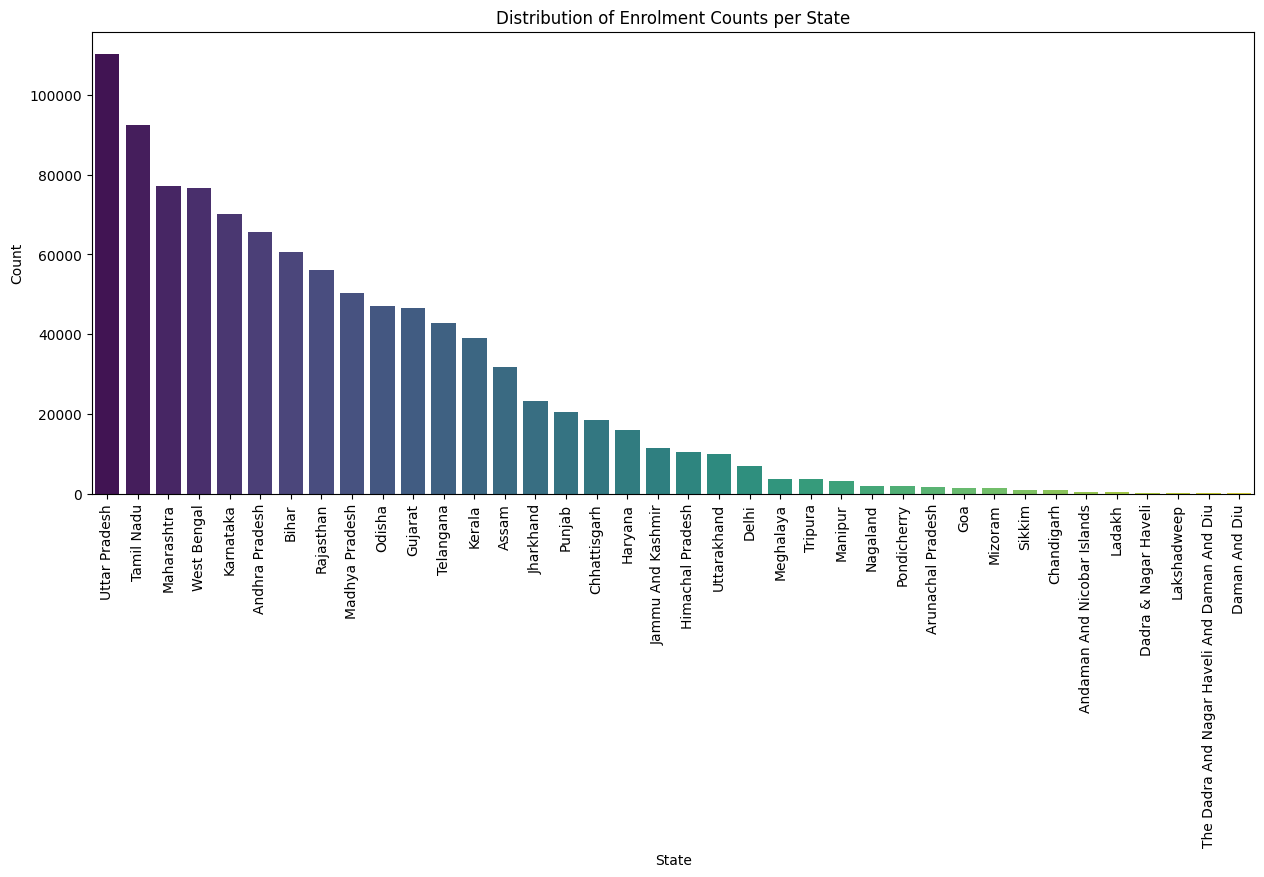

In [53]:
print("Univariate Analysis of Enrolment Data")

# Distribution of states in enrol dataframe
plt.figure(figsize=(15, 6))
sns.countplot(data=enrol, x='state', order=enrol['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Enrolment Counts per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


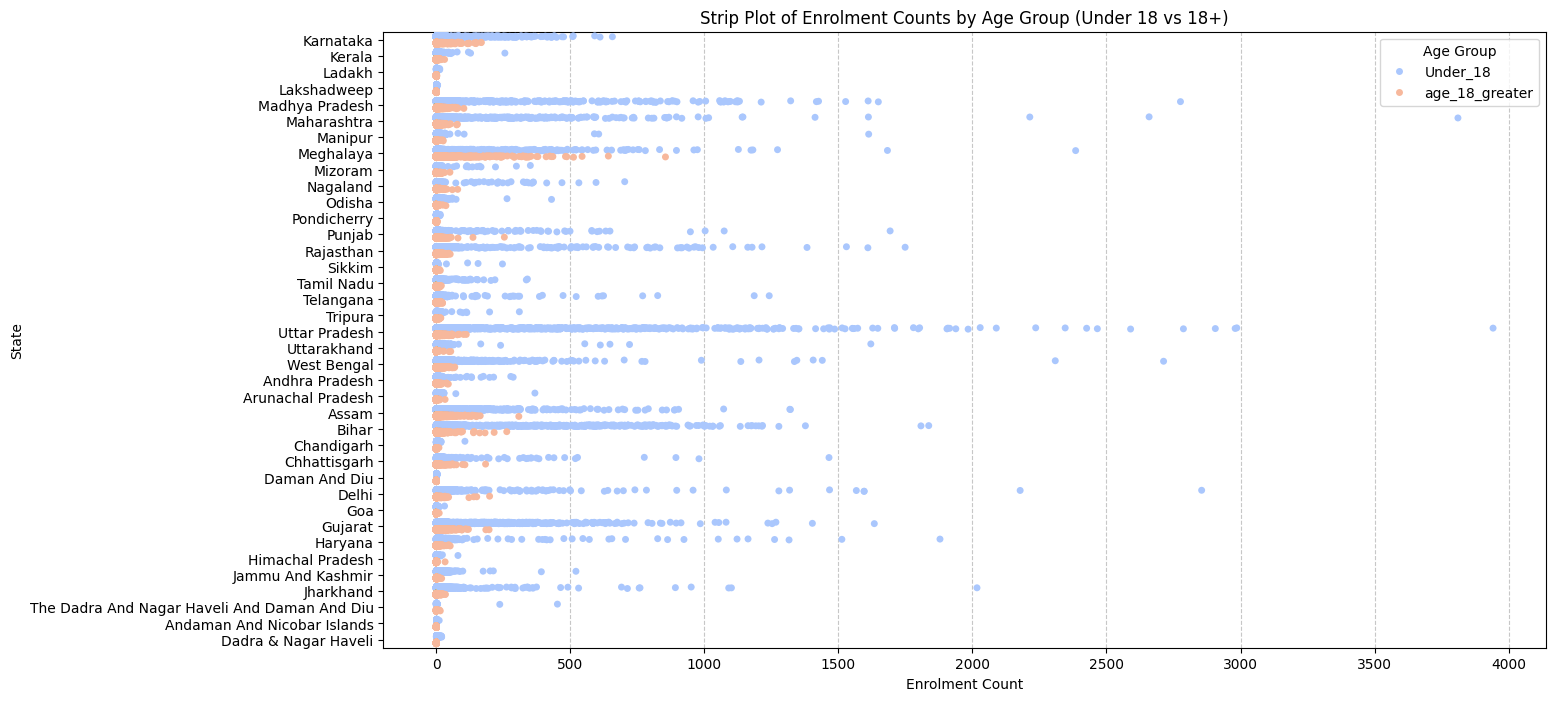

In [54]:
enrol['Under_18'] = enrol['age_0_5'] + enrol['age_5_17']

# Prepare data for plotting by melting the DataFrame
age_groups_data = enrol[['state', 'Under_18', 'age_18_greater']].melt(id_vars='state', var_name='Age_Group', value_name='Enrolment_Count')

plt.figure(figsize=(15, 8))
sns.stripplot(data=age_groups_data, x='Enrolment_Count', y='state', hue='Age_Group', jitter=True, palette='coolwarm', dodge=True)
plt.title('Strip Plot of Enrolment Counts by Age Group (Under 18 vs 18+)')
plt.xlabel('Enrolment Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

Total Enrolment for Ages Under 5: 3,546,965
Total Enrolment for Ages 5-17: 1,720,383
Total Enrolment for Ages 18 and Above: 168,136


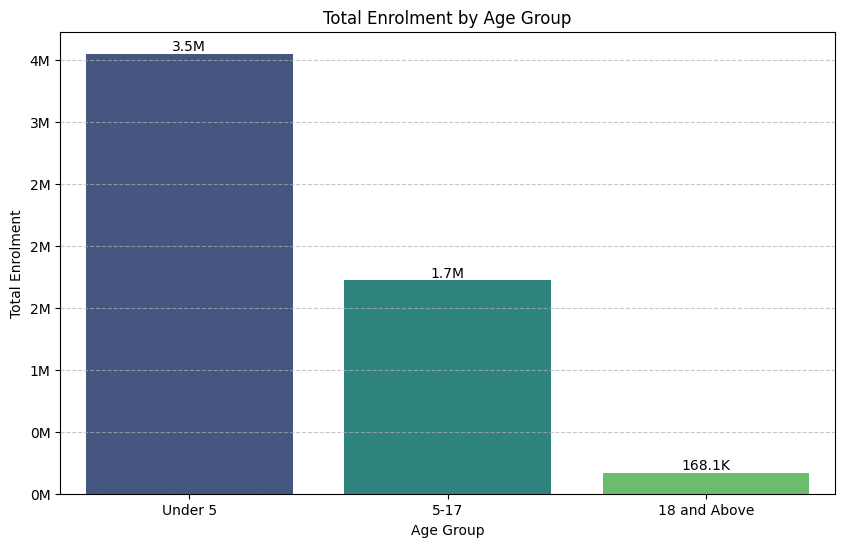

In [55]:
# Calculate total enrolment for each age group
total_age_0_5 = enrol['age_0_5'].sum()
total_age_5_17 = enrol['age_5_17'].sum()
total_age_18_greater = enrol['age_18_greater'].sum()

print(f"Total Enrolment for Ages Under 5: {total_age_0_5:,}")
print(f"Total Enrolment for Ages 5-17: {total_age_5_17:,}")
print(f"Total Enrolment for Ages 18 and Above: {total_age_18_greater:,}")

# Prepare data for plotting
enrolment_totals = pd.DataFrame({
    'Age Group': ['Under 5', '5-17', '18 and Above'],
    'Total Enrolment': [total_age_0_5, total_age_5_17, total_age_18_greater]
})

# Plotting the histogram (bar plot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=enrolment_totals, x='Age Group', y='Total Enrolment', palette='viridis')
plt.title('Total Enrolment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Enrolment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.show()


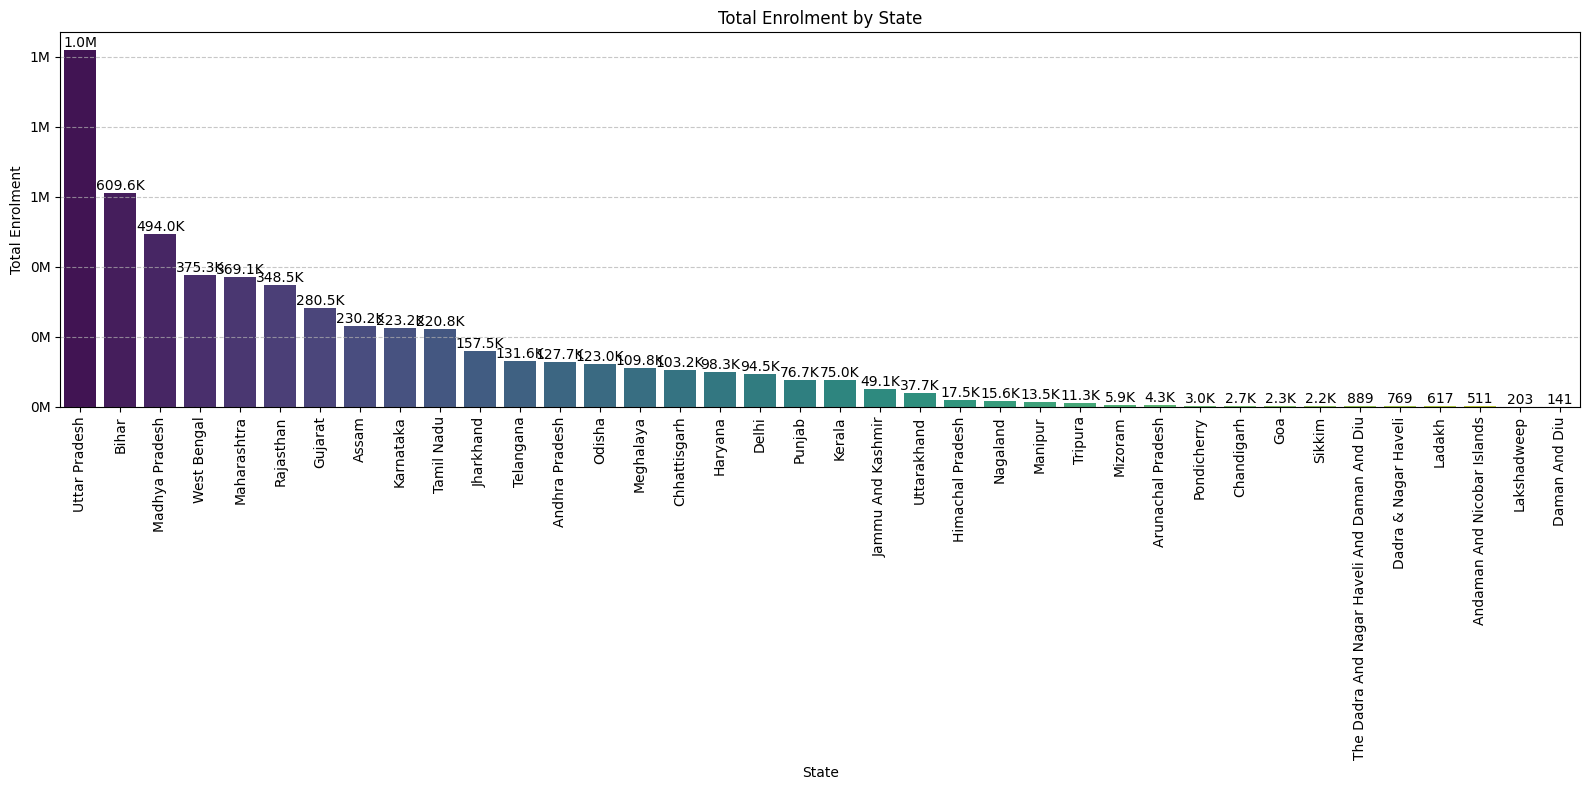

In [56]:
enrol['Total Enrolment'] = enrol['age_0_5'] + enrol['age_5_17'] + enrol['age_18_greater']

# Calculate total enrolment by state
state_enrolment = enrol.groupby('state')['Total Enrolment'].sum().reset_index()

# Sort the states by total enrolment for better visualization
state_enrolment = state_enrolment.sort_values(by='Total Enrolment', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=state_enrolment, x='state', y='Total Enrolment', palette='viridis')
plt.title('Total Enrolment by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Demographic Data


### Understanding the distribution of State, Age

Univariate Analysis of Demographic Data


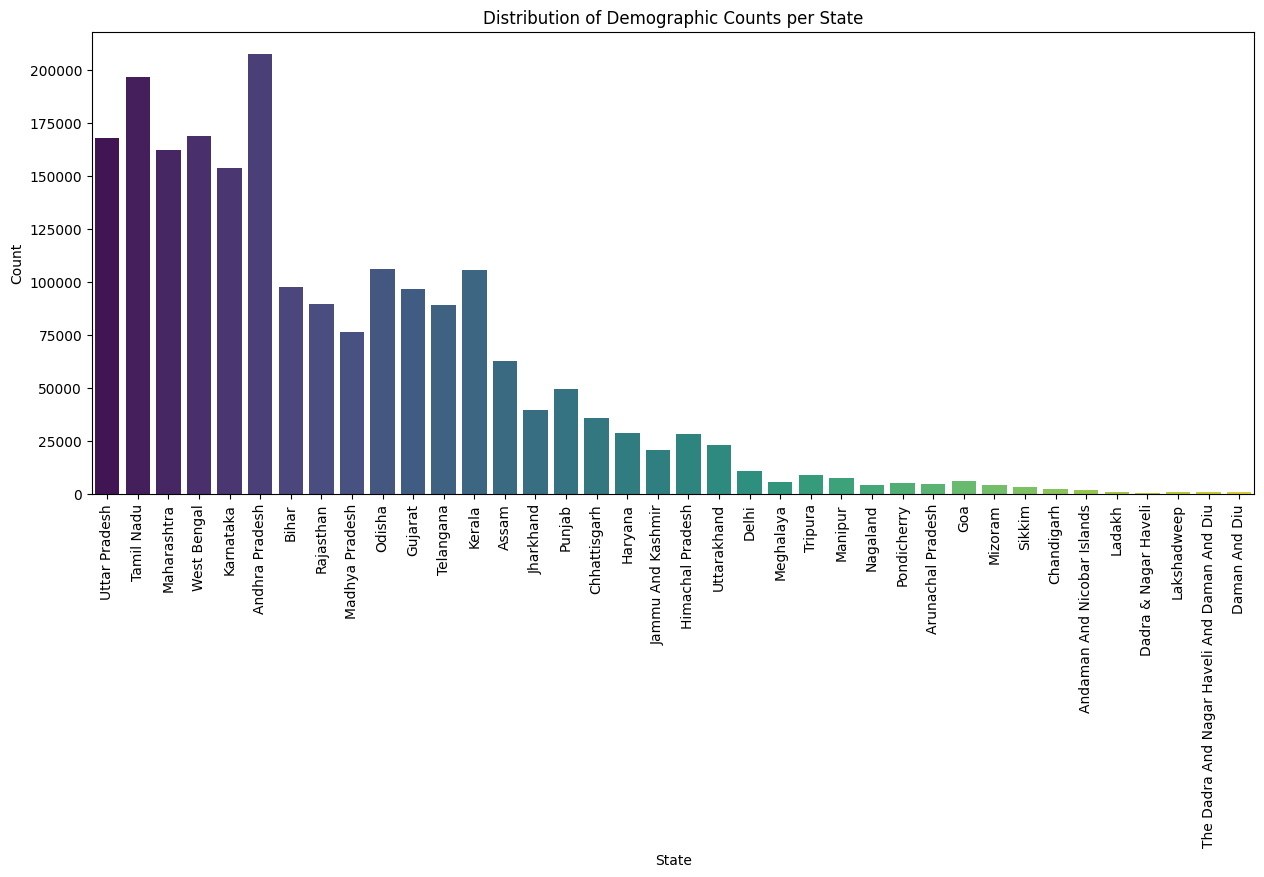

In [57]:
print("Univariate Analysis of Demographic Data")

# Distribution of states in demographic dataframe
plt.figure(figsize=(15, 6))
sns.countplot(data=demographic, x='state', order=enrol['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Demographic Counts per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


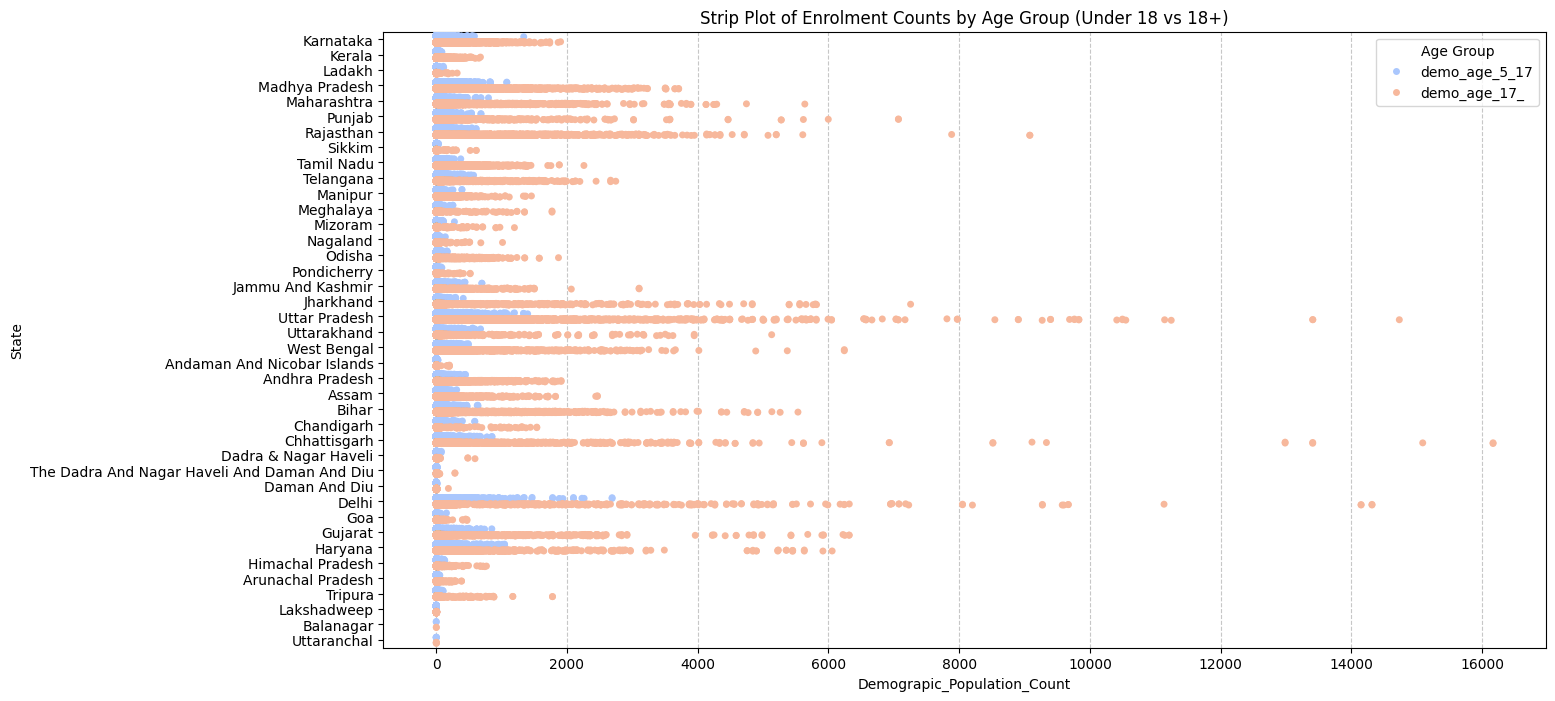

In [58]:
# Prepare data for plotting by melting the DataFrame
age_groups_data = demographic[['state', 'demo_age_5_17', 'demo_age_17_']].melt(id_vars='state', var_name='Age_Group', value_name='Demograpic_Population_Count')

plt.figure(figsize=(15, 8))
sns.stripplot(data=age_groups_data, x='Demograpic_Population_Count', y='state', hue='Age_Group', jitter=True, palette='coolwarm', dodge=True)
plt.title('Strip Plot of Enrolment Counts by Age Group (Under 18 vs 18+)')
plt.xlabel('Demograpic_Population_Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

Total Demographic Enrolment for Ages 5-17: 4,863,424
Total Demographic Enrolment for Ages 17 and Above: 44,431,761


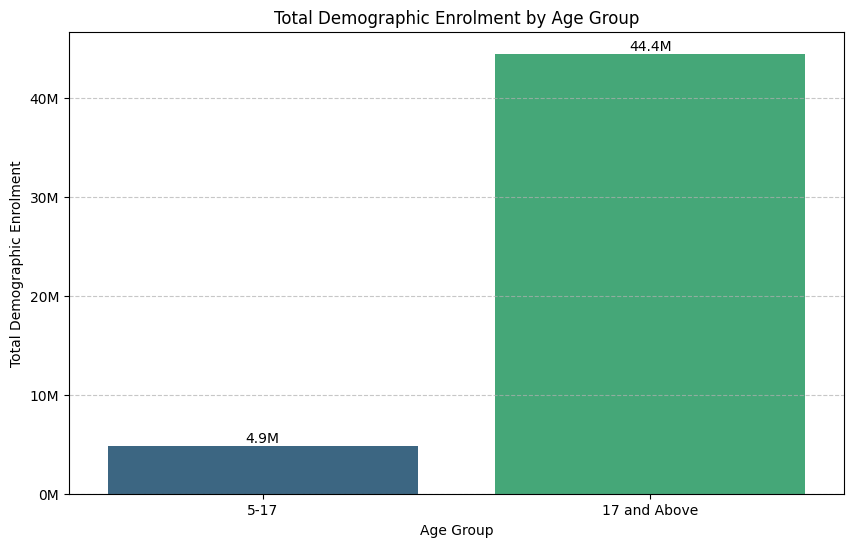

In [59]:
# Calculate total demographic enrolment for each age group
total_demo_age_5_17 = demographic['demo_age_5_17'].sum()
total_demo_age_17_ = demographic['demo_age_17_'].sum()

print(f"Total Demographic Enrolment for Ages 5-17: {total_demo_age_5_17:,}")
print(f"Total Demographic Enrolment for Ages 17 and Above: {total_demo_age_17_:,}")

# Prepare data for plotting
demographic_totals = pd.DataFrame({
    'Age Group': ['5-17', '17 and Above'],
    'Total Demographic Enrolment': [total_demo_age_5_17, total_demo_age_17_]
})

# Plotting the histogram (bar plot)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=demographic_totals, x='Age Group', y='Total Demographic Enrolment', palette='viridis')
plt.title('Total Demographic Enrolment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Demographic Enrolment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.show()

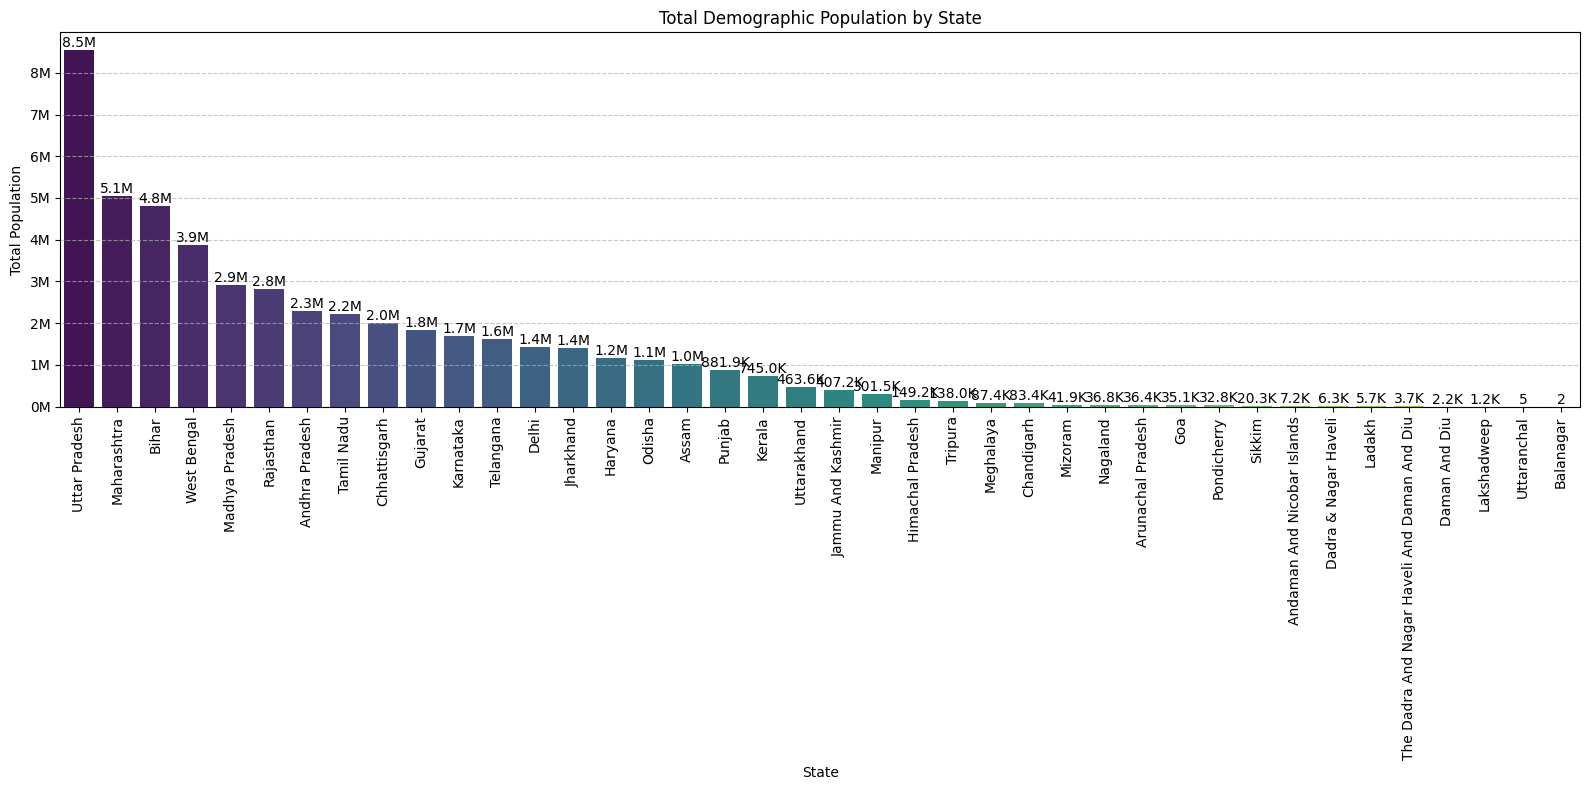

In [60]:
demographic['Total_Population_AgeGroup'] = demographic['demo_age_5_17'] + demographic['demo_age_17_']

# Calculate total demographic population by state
state_demographic = demographic.groupby('state')['Total_Population_AgeGroup'].sum().reset_index()

# Sort the states by total population for better visualization
state_demographic = state_demographic.sort_values(by='Total_Population_AgeGroup', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=state_demographic, x='state', y='Total_Population_AgeGroup', palette='viridis')
plt.title('Total Demographic Population by State')
plt.xlabel('State')
plt.ylabel('Total Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Biometric Data


### Understanding the distribution of State, Age

Univariate Analysis of Biometric Data


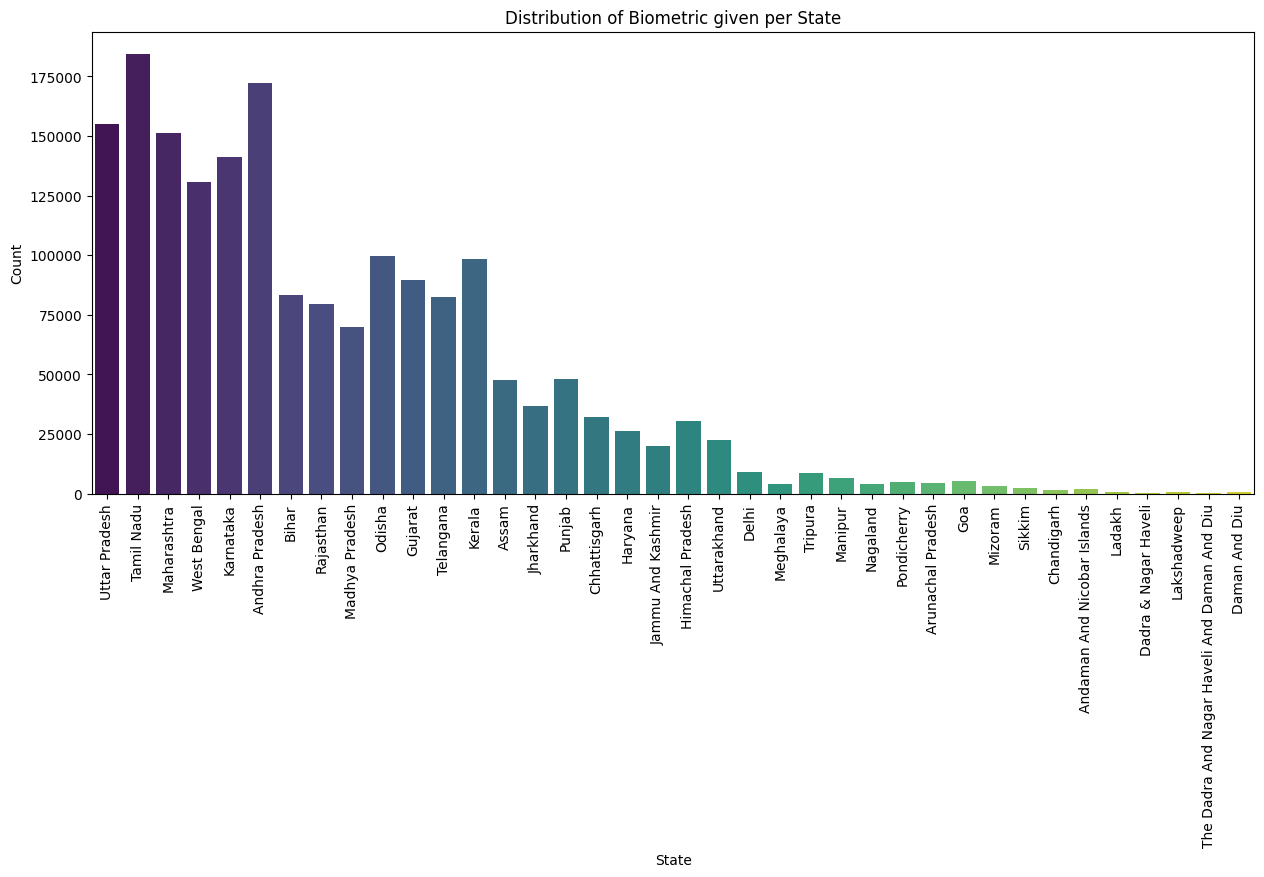

In [61]:
print("Univariate Analysis of Biometric Data")

# Distribution of states in Biometric dataframe
plt.figure(figsize=(15, 6))
sns.countplot(data=bio, x='state', order=enrol['state'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Biometric given per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()


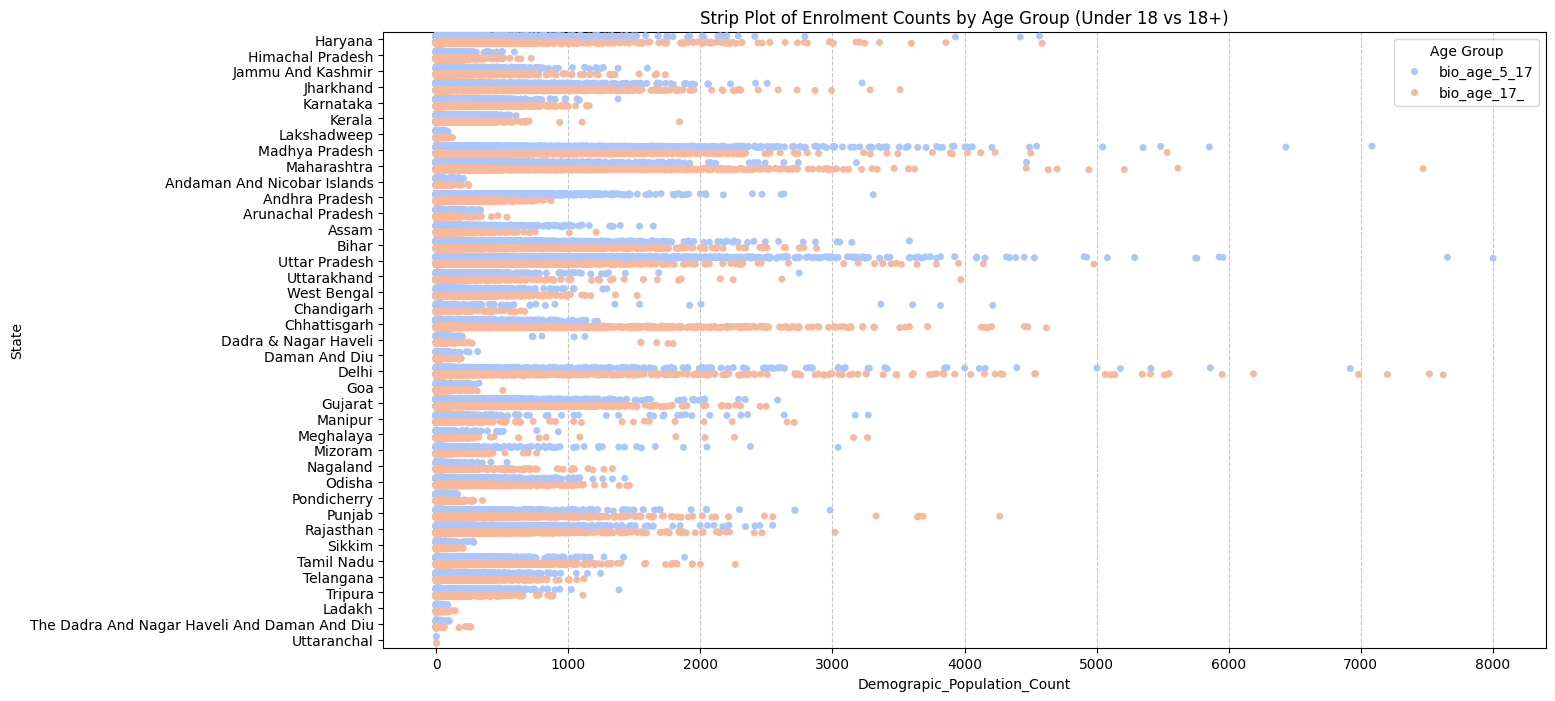

In [62]:
# Prepare data for plotting by melting the DataFrame
age_groups_data = bio[['state', 'bio_age_5_17', 'bio_age_17_']].melt(id_vars='state', var_name='Age_Group', value_name='BiometricGiven_Population_Count')

plt.figure(figsize=(15, 8))
sns.stripplot(data=age_groups_data, x='BiometricGiven_Population_Count', y='state', hue='Age_Group', jitter=True, palette='coolwarm', dodge=True)
plt.title('Strip Plot of Enrolment Counts by Age Group (Under 18 vs 18+)')
plt.xlabel('Demograpic_Population_Count')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.show()

Total Biometric Given for Ages 5-17: 34,226,855
Total Biometric Given for Ages 17 and Above: 35,536,240


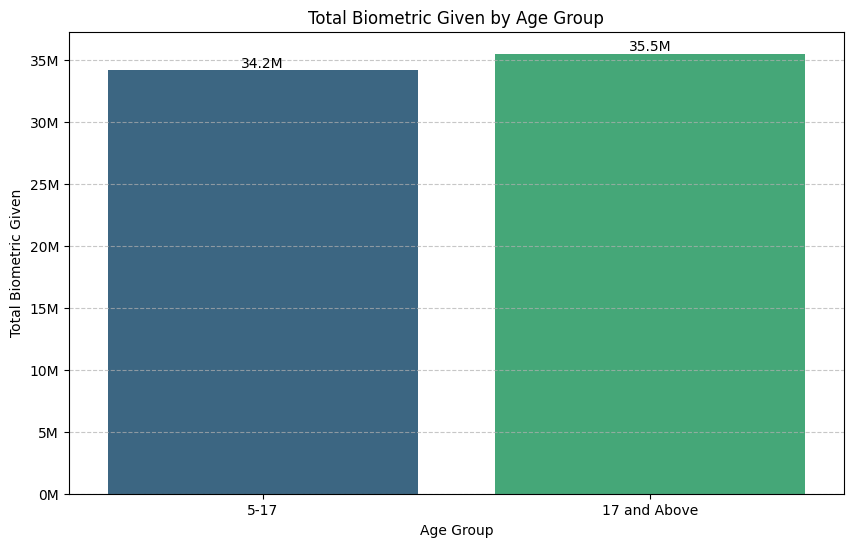

In [63]:
# Calculate total biometric given for each age group
total_bio_age_5_17 = bio['bio_age_5_17'].sum()
total_bio_age_17_ = bio['bio_age_17_'].sum()

print(f"Total Biometric Given for Ages 5-17: {total_bio_age_5_17:,}")
print(f"Total Biometric Given for Ages 17 and Above: {total_bio_age_17_:,}")

# Prepare data for plotting
biometric_totals = pd.DataFrame({
    'Age Group': ['5-17', '17 and Above'],
    'Total Biometric Given': [total_bio_age_5_17, total_bio_age_17_]
})

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=biometric_totals, x='Age Group', y='Total Biometric Given', palette='viridis')
plt.title('Total Biometric Given by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Biometric Given')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.show()

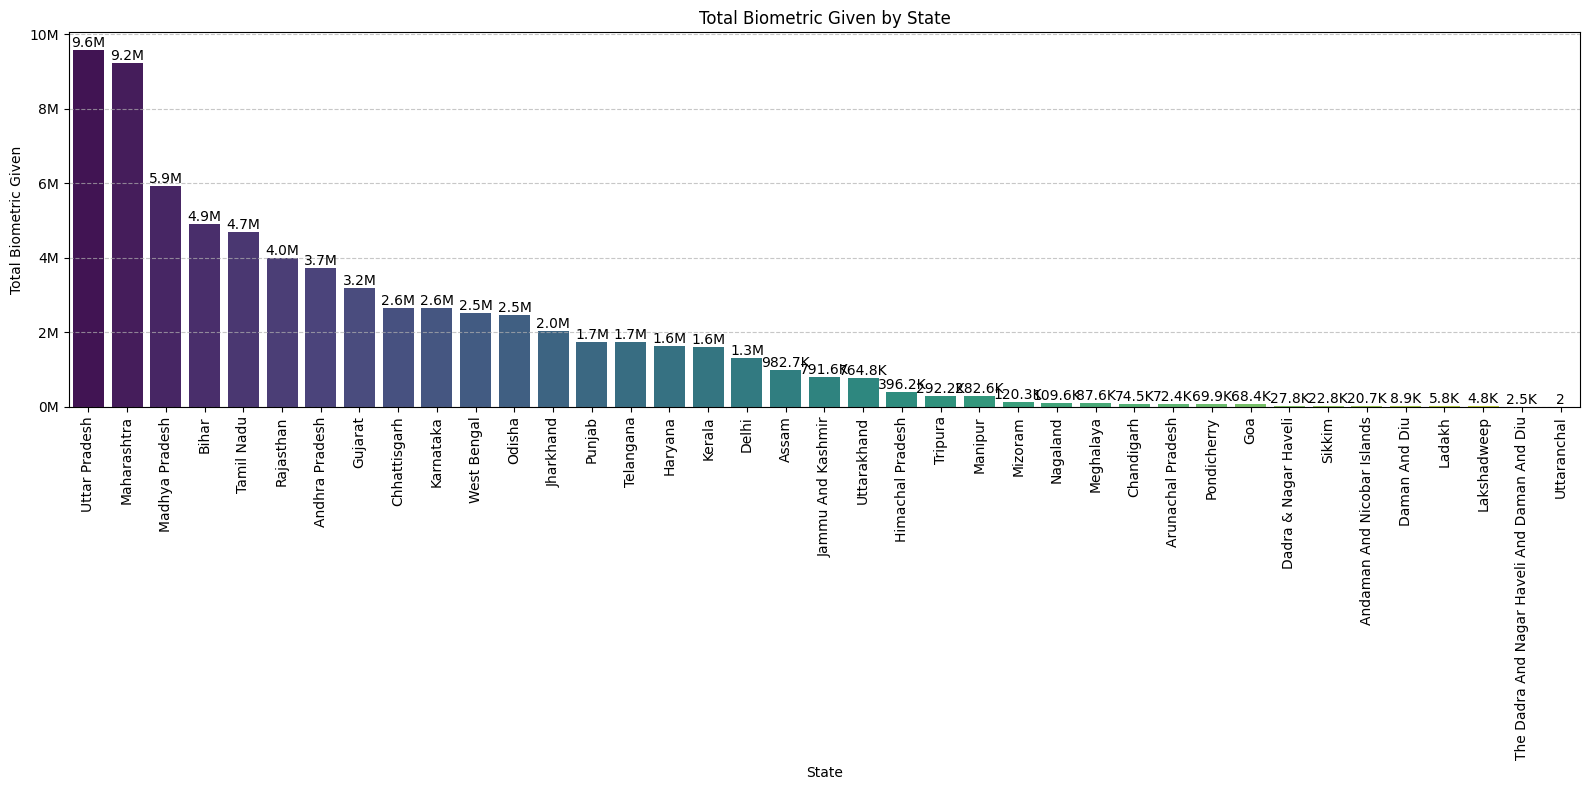

In [64]:
# Calculate total biometric given by state
bio['Total_Biometric_Given_AgeGroup'] = bio['bio_age_5_17'] + bio['bio_age_17_']
state_biometric = bio.groupby('state')['Total_Biometric_Given_AgeGroup'].sum().reset_index()

# Sort the states by total biometric given for better visualization
state_biometric = state_biometric.sort_values(by='Total_Biometric_Given_AgeGroup', ascending=False)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=state_biometric, x='state', y='Total_Biometric_Given_AgeGroup', palette='viridis')
plt.title('Total Biometric Given by State')
plt.xlabel('State')
plt.ylabel('Total Biometric Given')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

# Add labels on top of the bars
for p in ax.patches:
    height = p.get_height()
    if height >= 1_000_000_000:
        label = f'{height/1_000_000_000:.1f}B'
    elif height >= 1_000_000:
        label = f'{height/1_000_000:.1f}M'
    elif height >= 1_000:
        label = f'{height/1_000:.1f}K'
    else:
        label = f'{height:.0f}'
    ax.text(p.get_x() + p.get_width()/2.,
            height + 0.1,
            label,
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Univariate Analysis Insights

**Univariate Analysis Insights**

**Enrolment Data Analysis**

* **State Distribution:** Uttar Pradesh consistently shows the highest
enrolment counts across all age groups (0-5, 5-17, and 18+), followed by states like Madhya Pradesh, Maharashtra, West Bengal, and Bihar for younger age groups. For adults (18+), Meghalaya and Assam surprisingly top the list, indicating diverse enrolment patterns.

* **Age Group Distribution:** The highest total enrolments are observed in the age_0_5 group (over 3.5 million), followed by age_5_17 (over 1.7 million). The age_18_greater category has significantly fewer enrolments (around 168,000) in this dataset, suggesting a focus on younger age groups for new enrolments.

**Demographic Data Analysis**

* **State Distribution:** Uttar Pradesh again leads in total demographic population for both age groups (5-17 and 17+), followed by Maharashtra, Bihar, and Andhra Pradesh for the 5-17 age group, and Maharashtra, Bihar, West Bengal, and Rajasthan for the 17+ age group.

* **Age Group Distribution:** The demo_age_17_ (adults) group accounts for a vast majority of the demographic population (over 44 million), significantly overshadowing the demo_age_5_17 group (over 4.8 million). This aligns with general population demographics where adults are a larger segment.

**Biometric Data Insights**

* **State Distribution:** For biometric submissions in the 5-17 age group, Uttar Pradesh leads with over 6.2 million submissions. For the 17+ age group, Maharashtra leads with over 5.7 million biometric submissions, closely followed by Uttar Pradesh, Madhya Pradesh, Bihar, and Tamil Nadu.

* **Age Group Distribution:** Biometric submissions are relatively high and more evenly distributed between the bio_age_5_17 (over 34 million) and bio_age_17_ (over 35 million) age groups, with adults having a slightly higher count. This suggests broad capture of biometric data across these age segments.

Overall, Uttar Pradesh frequently appears as a leading state across different metrics and age groups, highlighting its significant contribution to Aadhaar data. There's a clear distinction in volume between younger age group enrolments and adult demographic/biometric data, reflecting both initial registration efforts and ongoing data collection for different population segments.

# BI-VARIATE ANALYSIS

## Understanding of the different variables

### Enrollment Data

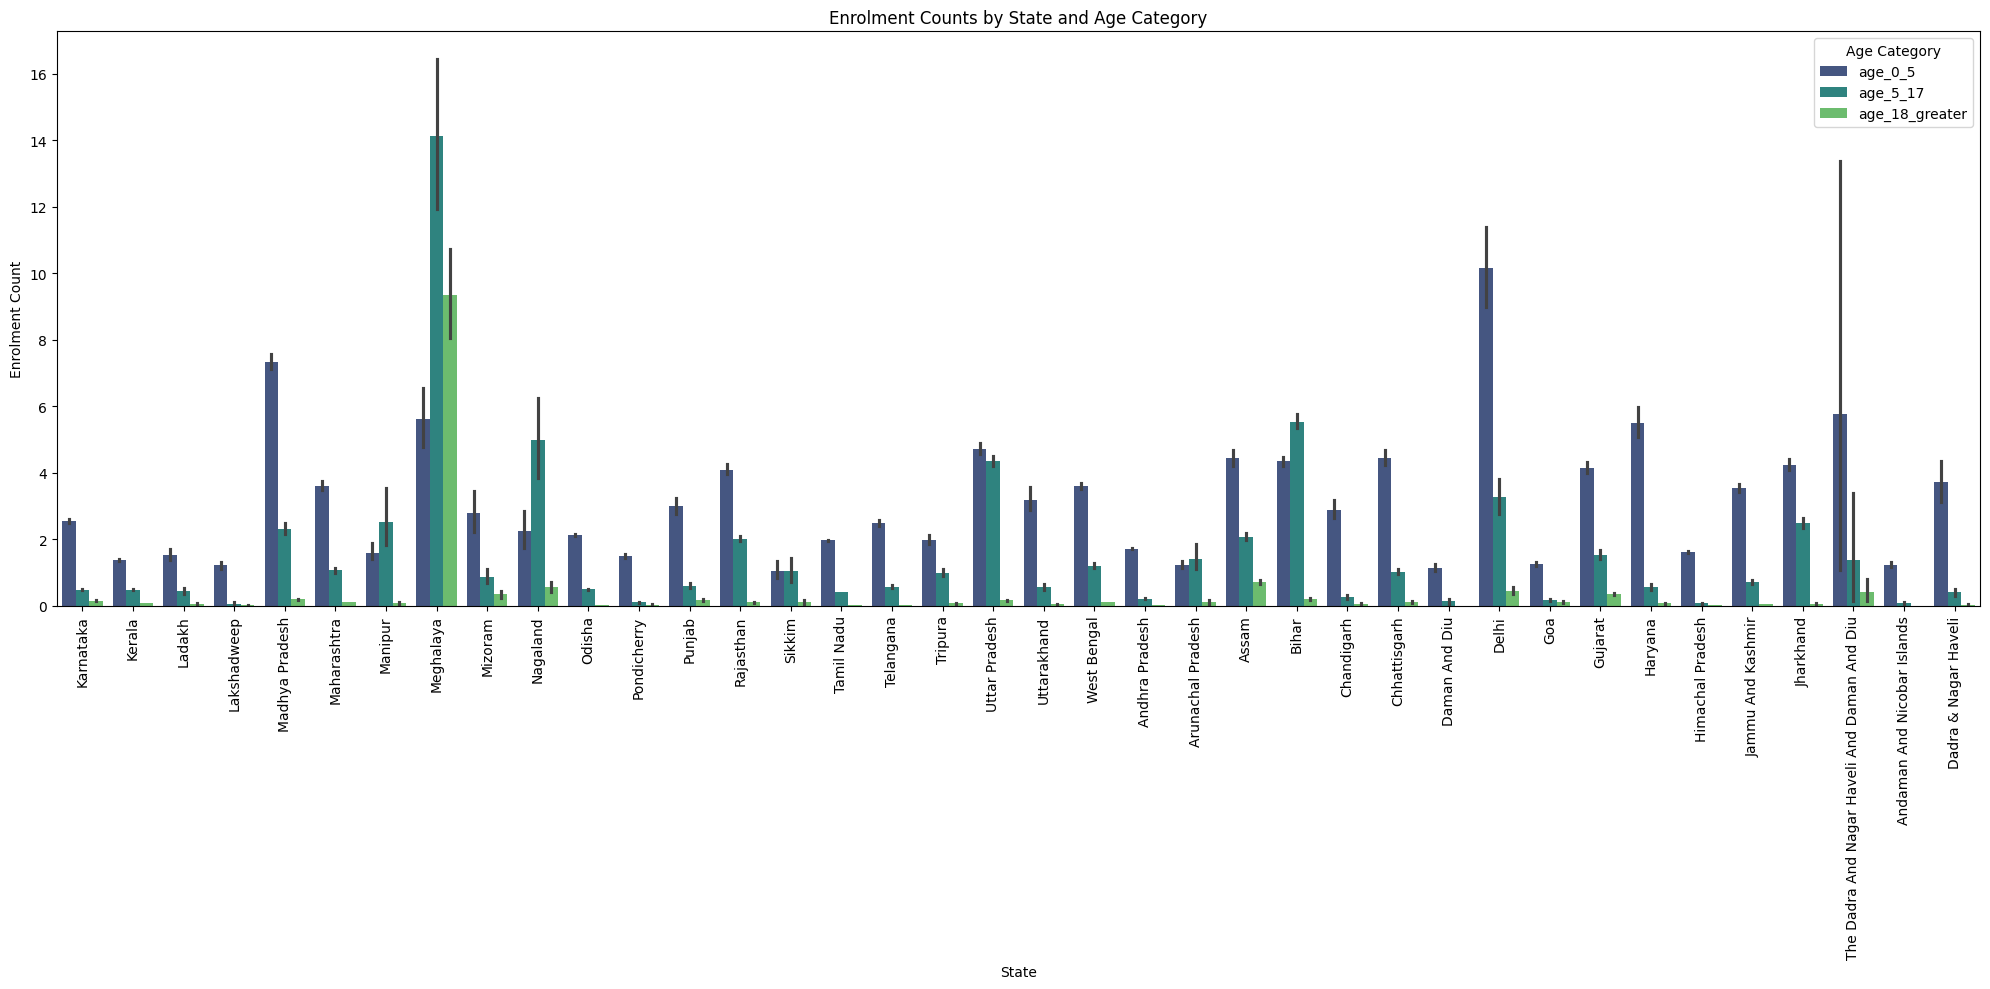

In [65]:
# Prepare data for grouped bar chart: state vs age groups
age_groups_melted = enrol.melt(id_vars=['state'],
                               value_vars=['age_0_5', 'age_5_17', 'age_18_greater'],
                               var_name='Age_Category',
                               value_name='Enrolment_Count')

plt.figure(figsize=(20, 10))
sns.barplot(data=age_groups_melted, x='state', y='Enrolment_Count', hue='Age_Category', palette='viridis')
plt.title('Enrolment Counts by State and Age Category')
plt.xlabel('State')
plt.ylabel('Enrolment Count')
plt.xticks(rotation=90)
plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

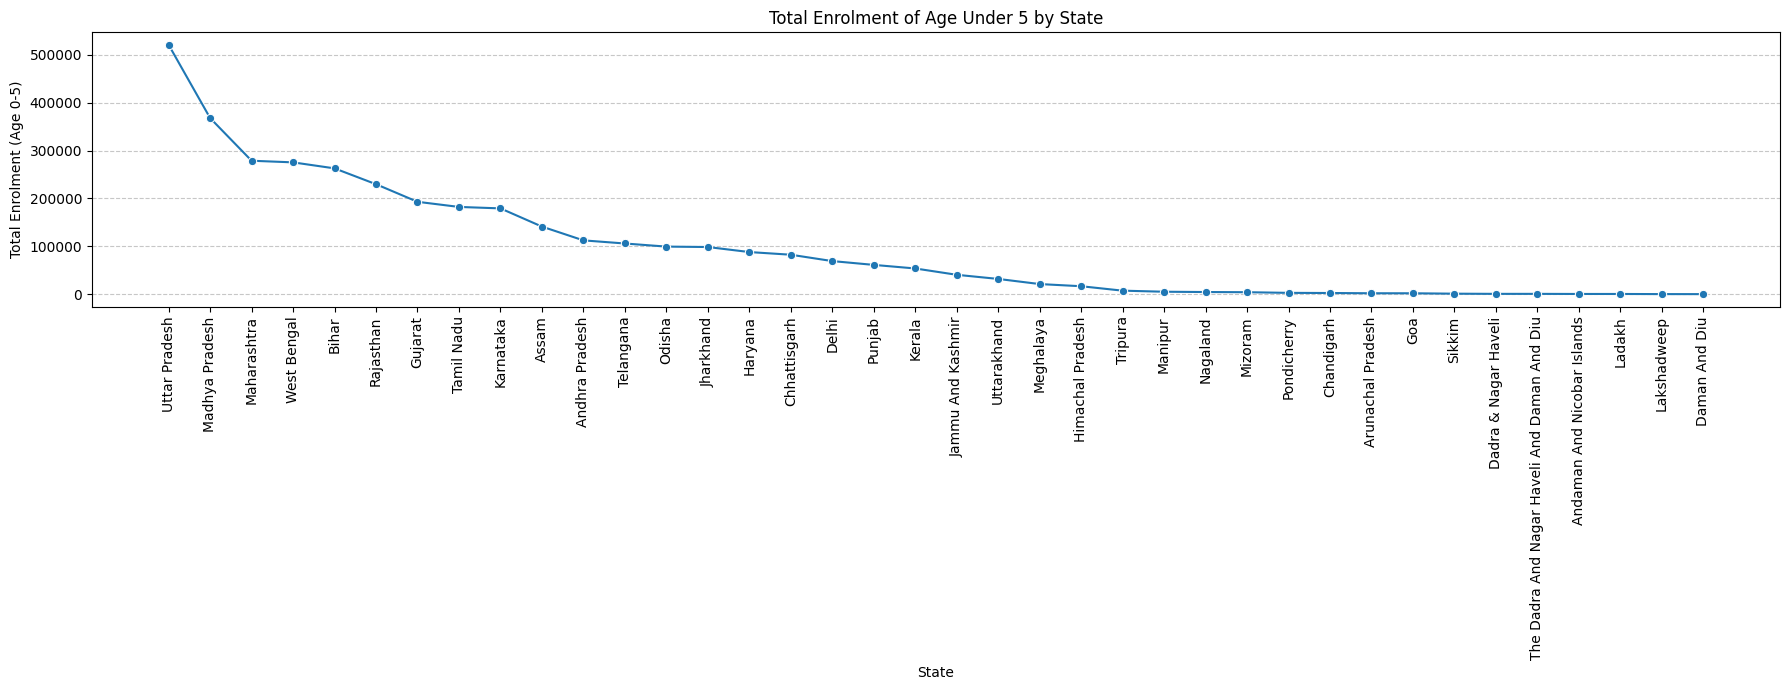

In [66]:
# Calculate total enrolment of 'age_0_5' by state
state_age_0_5_enrolment = enrol.groupby('state')['age_0_5'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_0_5_enrolment = state_age_0_5_enrolment.sort_values(by='age_0_5', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_0_5_enrolment, x='state', y='age_0_5', marker='o', palette='viridis')
plt.title('Total Enrolment of Age Under 5 by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment (Age 0-5)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [67]:
# Calculate total enrolment of 'age_5_17' by state
state_age_5_17_enrolment = enrol.groupby('state')['age_5_17'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_5_17_enrolment = state_age_5_17_enrolment.sort_values(by='age_5_17', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_5_17_enrolment, x='state', y='age_5_17', color = 'purple',ci = None)
plt.title('Total Enrolment of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
# Calculate total enrolment of 'age_17_above' by state
state_age_above18_enrolment = enrol.groupby('state')['age_18_greater'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_above18_enrolment = state_age_above18_enrolment.sort_values(by='age_18_greater', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_above18_enrolment, x='state', y='age_18_greater', color = 'purple',ci = None)
plt.title('Total Enrolment of Age 18 and Above by State')
plt.xlabel('State')
plt.ylabel('Total Enrolment (Age 18 & above)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
# Calculate total enrolment per district, keeping state information
enrol['Total_Enrolment'] = enrol['age_0_5'] + enrol['age_5_17'] + enrol['age_18_greater']
district_state_enrolment = enrol.groupby(['state', 'district'])['Total_Enrolment'].sum().reset_index()

# Sort by Total_Enrolment in descending order to show top districts
district_state_enrolment_sorted = district_state_enrolment.sort_values(by='Total_Enrolment', ascending=False)

# Select top N districts for visualization to avoid clutter
top_n = 50 # Adjust N as needed
top_districts = district_state_enrolment_sorted.head(top_n)

plt.figure(figsize=(18, 9))
sns.barplot(data=top_districts, x='district', y='Total_Enrolment', hue='state', dodge=False, palette='tab20')
plt.title(f'Top {top_n} Districts by Total Enrolment, Colored by State')
plt.xlabel('District')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Demographic Data

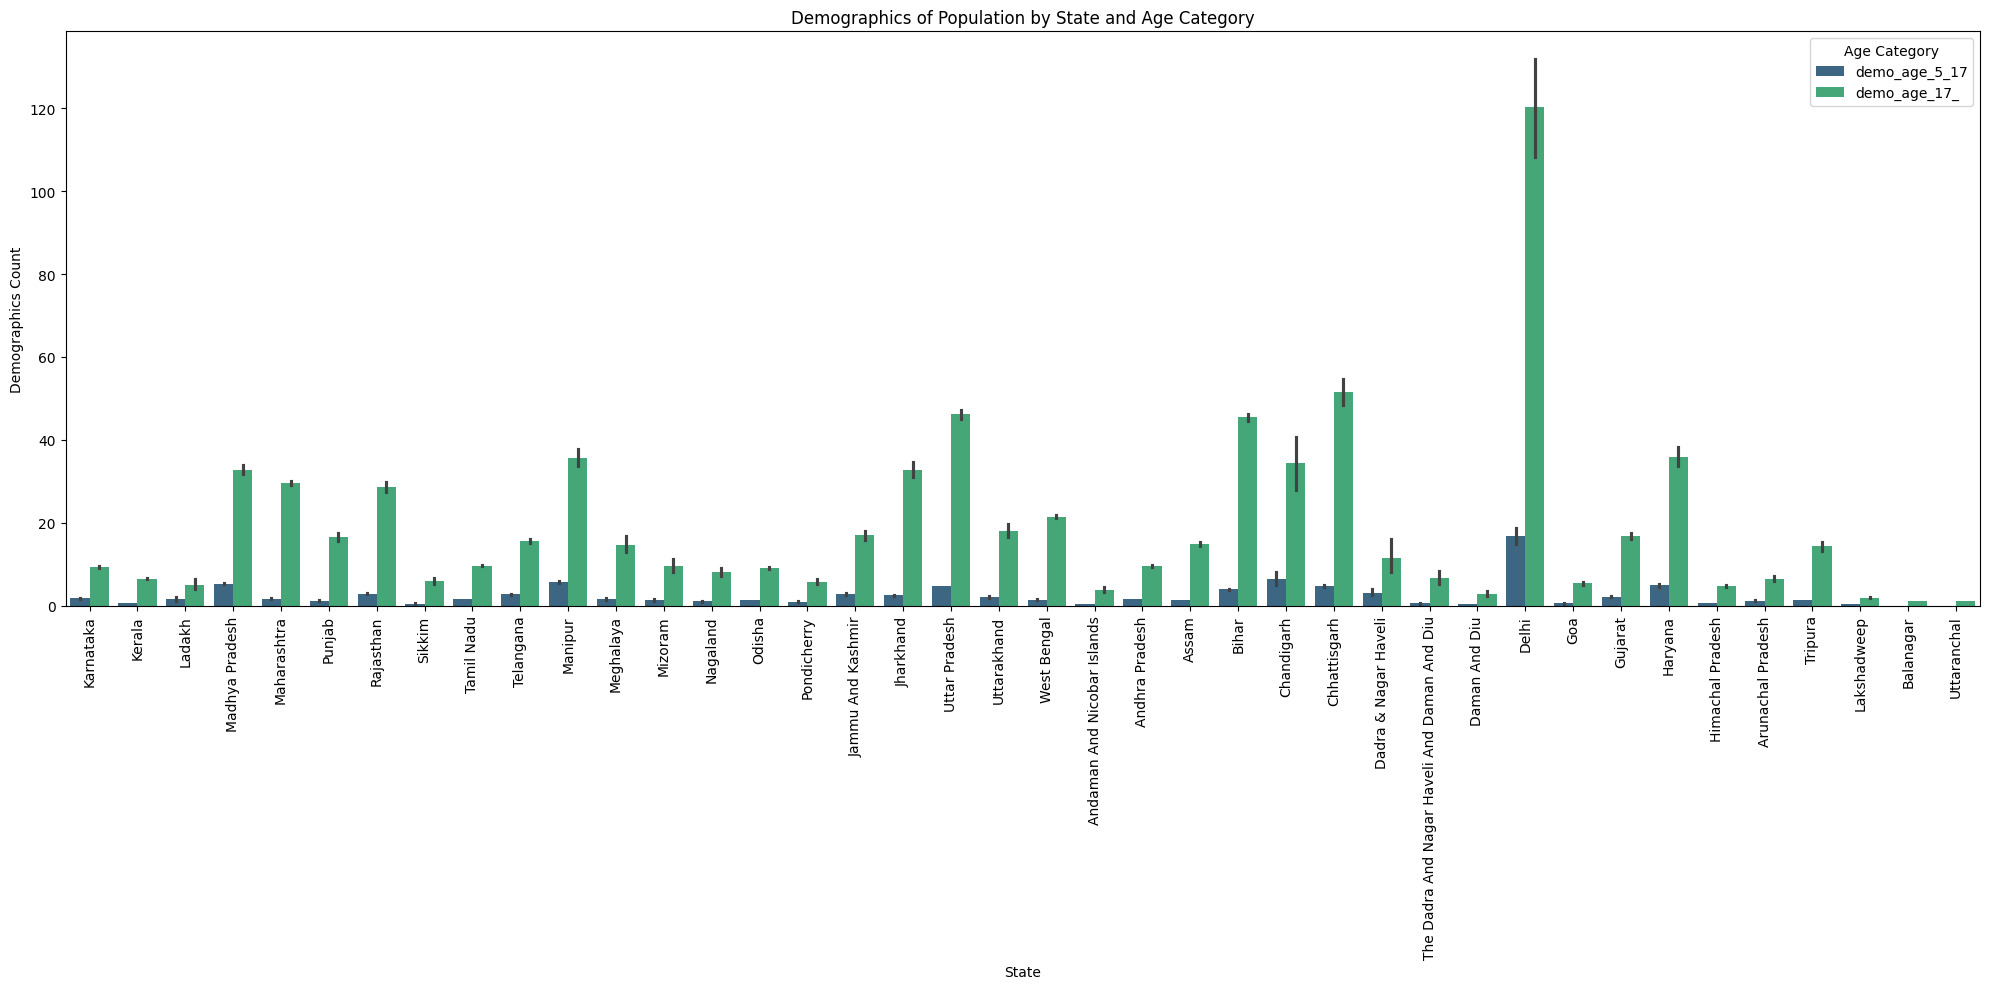

In [70]:
# Prepare data for grouped bar chart: state vs age groups
age_groups_melted = demographic.melt(id_vars=['state'],
                               value_vars=['demo_age_5_17', 'demo_age_17_'],
                               var_name='Age_Category',
                               value_name='Demographic_Count')

plt.figure(figsize=(20, 10))
sns.barplot(data=age_groups_melted, x='state', y='Demographic_Count', hue='Age_Category', palette='viridis')
plt.title('Demographics of Population by State and Age Category')
plt.xlabel('State')
plt.ylabel('Demographics Count')
plt.xticks(rotation=90)
plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

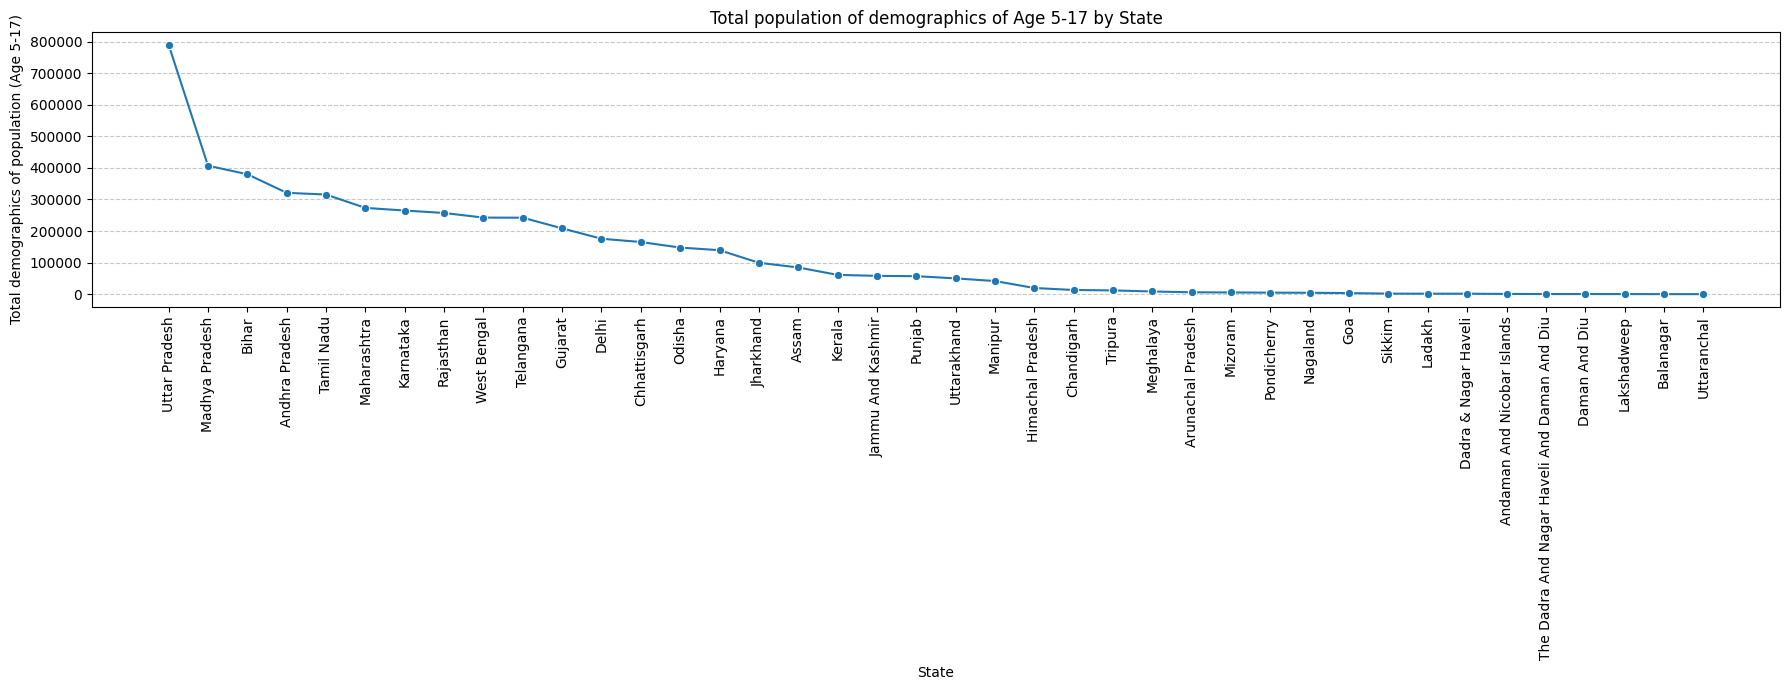

In [71]:
# Calculate total demograhic of 'age_5_17' by state
state_age_5_17_Population_demographic = demographic.groupby('state')['demo_age_5_17'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_5_17_Population_demographic = state_age_5_17_Population_demographic.sort_values(by='demo_age_5_17', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_5_17_Population_demographic, x='state', y='demo_age_5_17', marker='o', palette='viridis')
plt.title('Total population of demographics of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total demographics of population (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

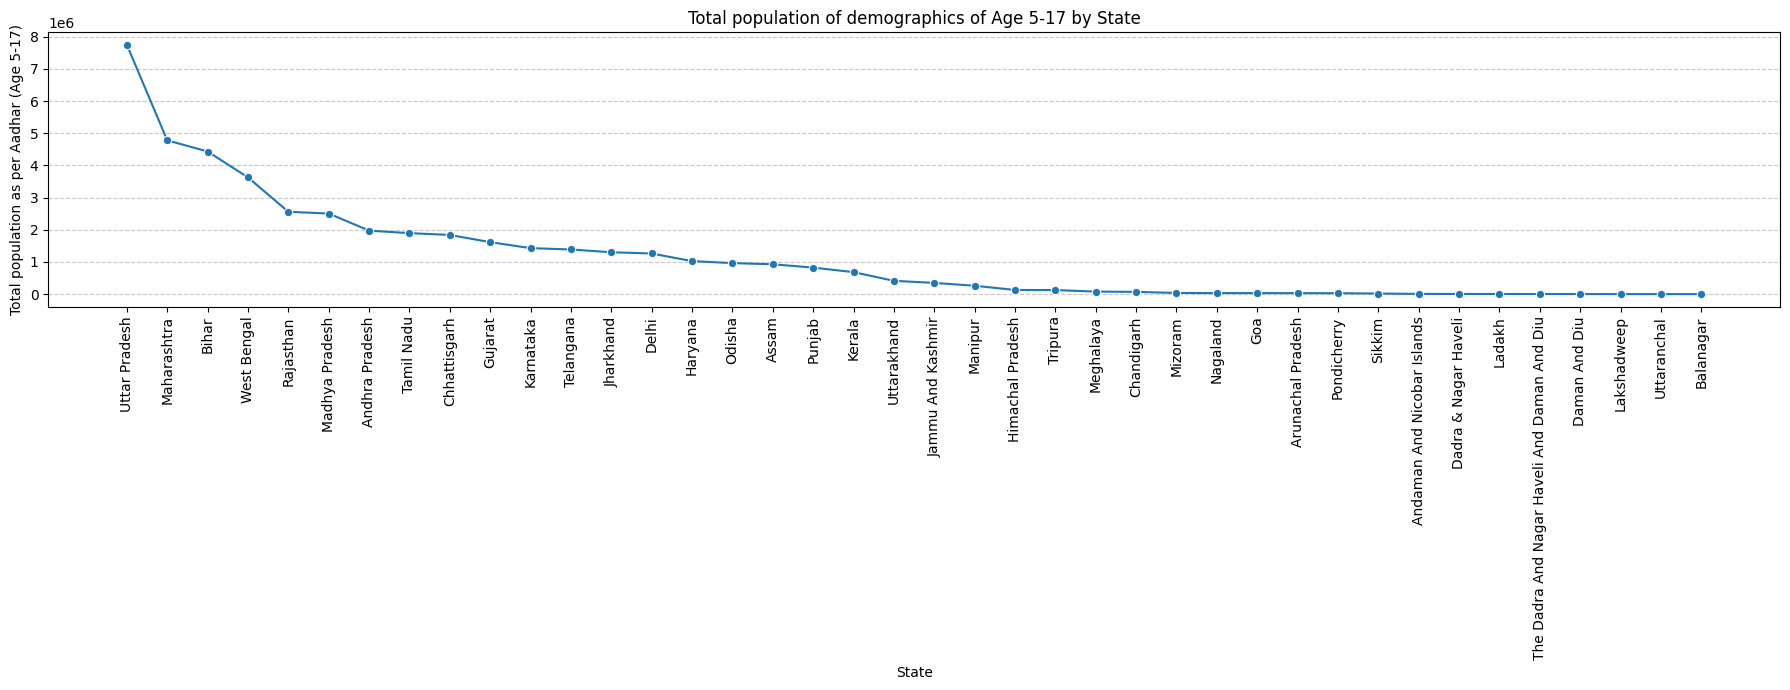

In [72]:
# Calculate total enrolment of 'age_17 and above' by state
state_age_17_Above_Population_demographic = demographic.groupby('state')['demo_age_17_'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_17_Above_Population_demographic = state_age_17_Above_Population_demographic.sort_values(by='demo_age_17_', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_17_Above_Population_demographic, x='state', y='demo_age_17_', marker='o', palette='viridis')
plt.title('Total population of demographics of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total population as per Aadhar (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [73]:
# Calculate total enrolments demographically per district, keeping state information
demographic['Total_Population_AgeGroup'] = demographic['demo_age_5_17'] + demographic['demo_age_17_']
district_state_demographics_data = demographic.groupby(['state', 'district'])['Total_Population_AgeGroup'].sum().reset_index()

# Sort by Total_Population_demographics in descending order to show top districts
district_state_demographics_sorted = district_state_demographics_data.sort_values(by='Total_Population_AgeGroup', ascending=False)

# Select top N districts for visualization to avoid clutter
top_n = 50 # Adjust N as needed
top_districts = district_state_demographics_sorted.head(top_n)

plt.figure(figsize=(18, 9))
sns.barplot(data=top_districts, x='district', y='Total_Population_AgeGroup', hue='state', dodge=False, palette='tab20')
plt.title(f'Top {top_n} Districts by Total Population, Colored by State')
plt.xlabel('District')
plt.ylabel('Total population as per Aadhar')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Biometric Data

In [74]:
# Prepare data for grouped bar chart: state vs age groups
age_groups_melted = bio.melt(id_vars=['state'],
                               value_vars=['bio_age_5_17', 'bio_age_17_'],
                               var_name='Age_Category',
                               value_name='biometric_Count')

plt.figure(figsize=(20, 10))
sns.barplot(data=age_groups_melted, x='state', y='biometric_Count', hue='Age_Category', palette='viridis')
plt.title('Biometrics given by State and Age Category')
plt.xlabel('State')
plt.ylabel('Biometrics Count')
plt.xticks(rotation=90)
plt.legend(title='Age Category')
plt.tight_layout()
plt.show()

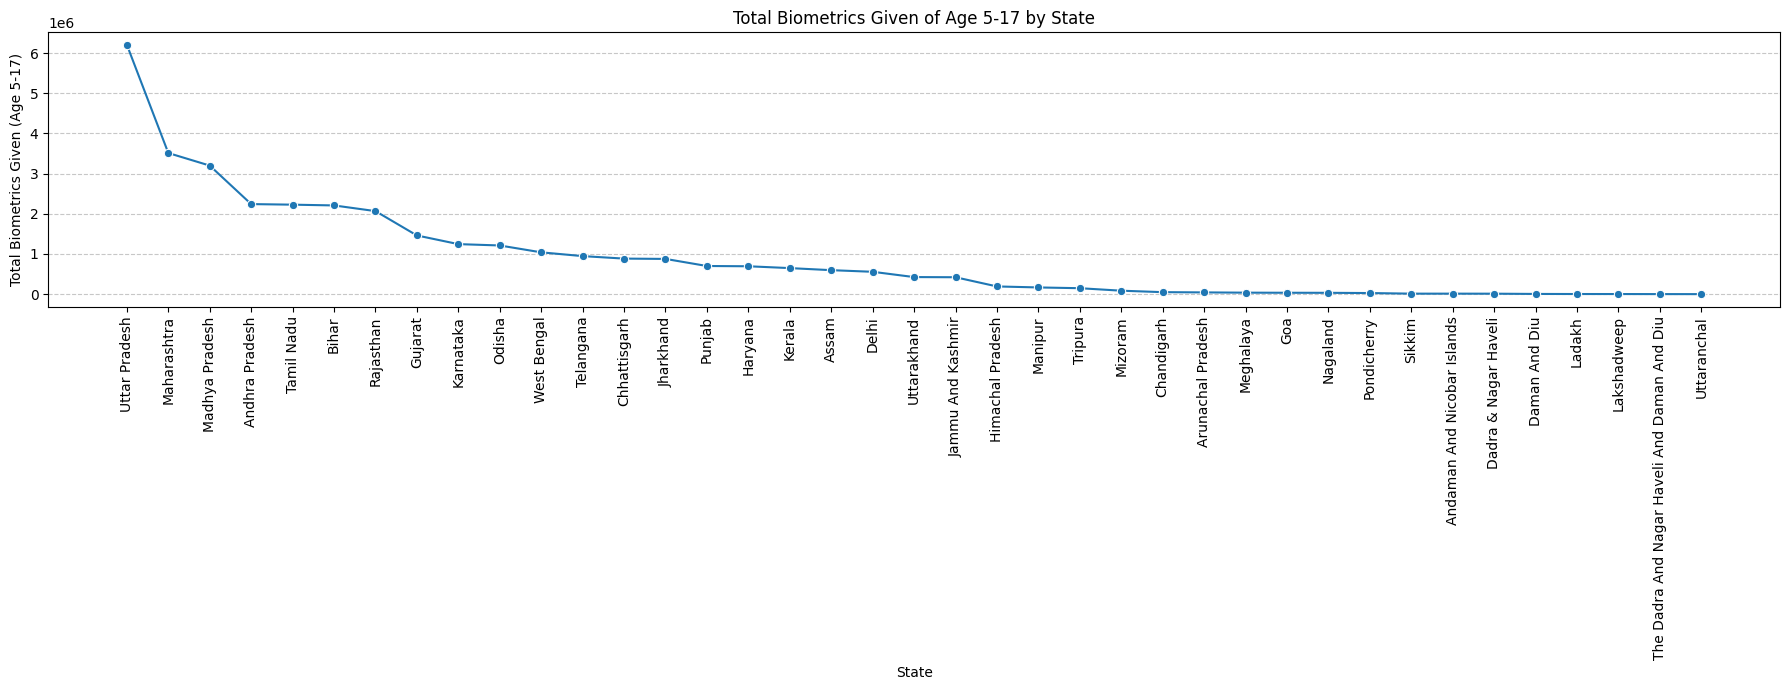

In [75]:
# Calculate total biometrics given of 'age_5_17' by state
state_age_5_17_biometrics_given = bio.groupby('state')['bio_age_5_17'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_5_17_biometrics_given_sorted = state_age_5_17_biometrics_given.sort_values(by='bio_age_5_17', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_5_17_biometrics_given_sorted, x='state', y='bio_age_5_17', marker='o', palette='viridis')
plt.title('Total Biometrics Given of Age 5-17 by State')
plt.xlabel('State')
plt.ylabel('Total Biometrics Given (Age 5-17)')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [76]:
# Calculate total enrolment of 'age_17 and above' by state
state_age_17_Above_biometric_given = bio.groupby('state')['bio_age_17_'].sum().reset_index()

# Sort for better visualization in a line plot, if desired
state_age_17_Above_biometric_given_sorted = state_age_17_Above_biometric_given.sort_values(by='bio_age_17_', ascending=False)

plt.figure(figsize=(18, 7))
sns.lineplot(data=state_age_17_Above_biometric_given_sorted, x='state', y='bio_age_17_', marker='o', palette='viridis')
plt.title('Total Biometrics Given Age 17 & above by State')
plt.xlabel('State')
plt.ylabel('Total Biometrics Given (Age 17 & above )')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

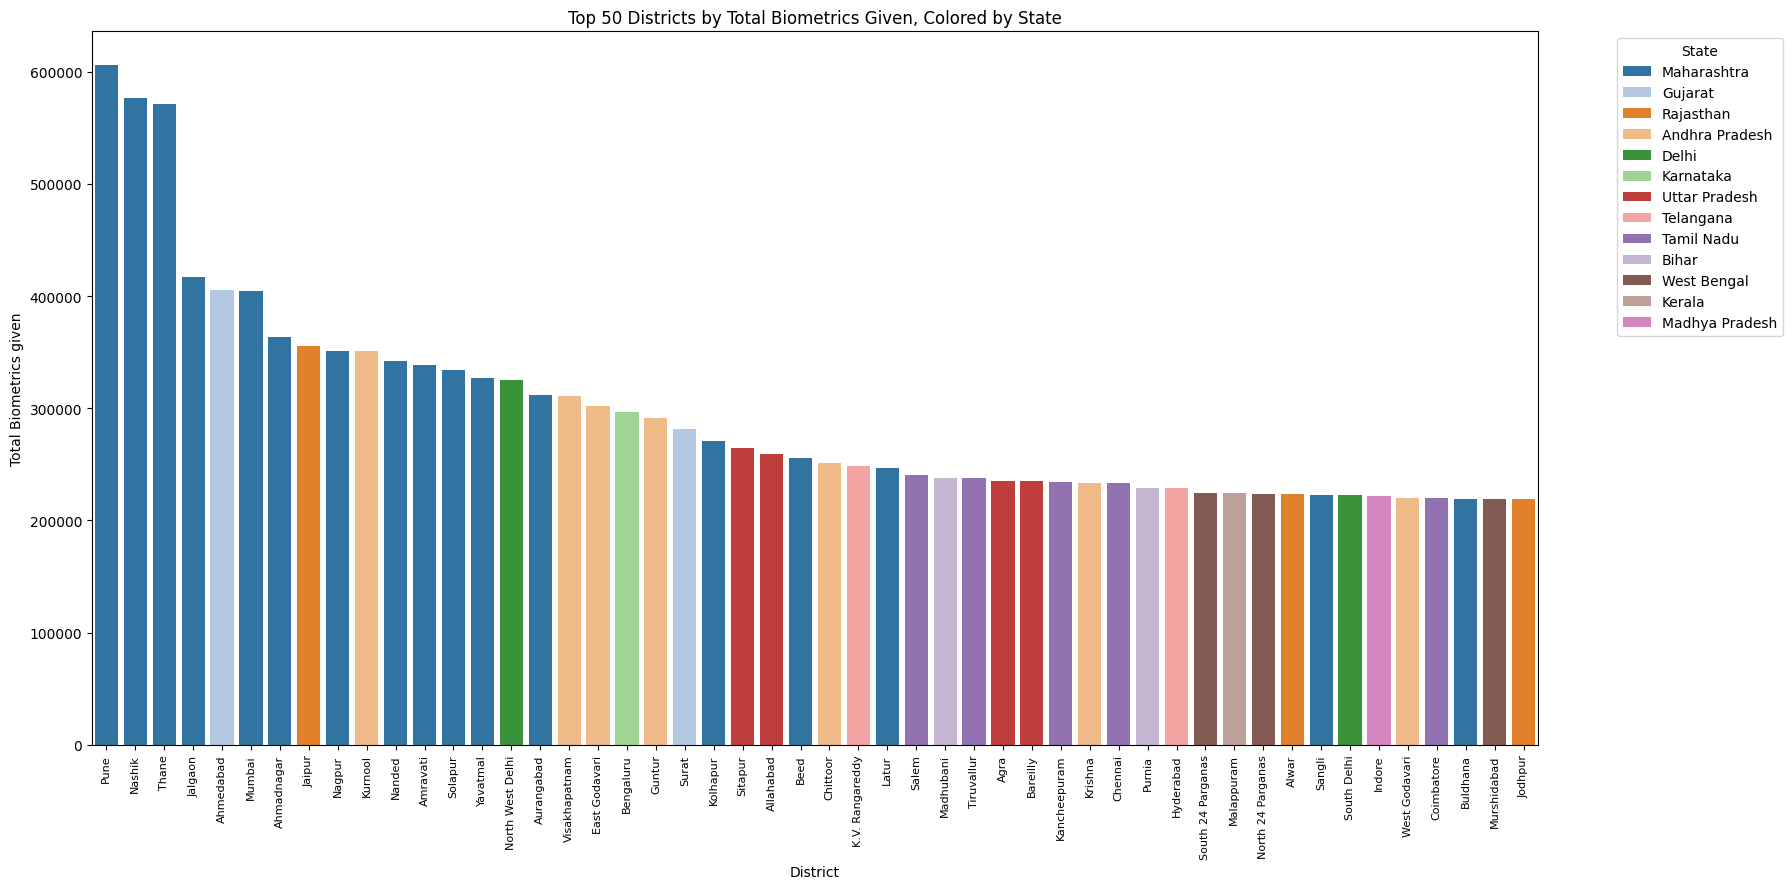

In [77]:
# Calculate total enrolments demographically per district, keeping state information
bio['Total_Biometric_Given_AgeGroup'] = bio['bio_age_5_17'] + bio['bio_age_17_']
district_state_biometric_data = bio.groupby(['state', 'district'])['Total_Biometric_Given_AgeGroup'].sum().reset_index()

# Sort by Total_Population_demographics in descending order to show top districts
district_state_biometric_sorted = district_state_biometric_data.sort_values(by='Total_Biometric_Given_AgeGroup', ascending=False)

# Select top N districts for visualization to avoid clutter
top_n = 50 # Adjust N as needed
top_districts = district_state_biometric_sorted.head(top_n)

plt.figure(figsize=(18, 9))
sns.barplot(data=top_districts, x='district', y='Total_Biometric_Given_AgeGroup', hue='state', dodge=False, palette='tab20')
plt.title(f'Top {top_n} Districts by Total Biometrics Given, Colored by State')
plt.xlabel('District')
plt.ylabel('Total Biometrics given')
plt.xticks(rotation=90, fontsize=8)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Bi-variate Analysis Insights

### Enrolment Data Analysis
*   **State vs. Age Category Enrolment:** The grouped bar chart reveals that Uttar Pradesh, Madhya Pradesh, and Bihar consistently show higher enrolments across all age categories (0-5, 5-17, 18+). However, the proportion of 'age_0_5' enrolments is notably higher in states like Uttar Pradesh, whereas 'age_18_greater' enrolments are comparatively very low across most states, with a few exceptions like Meghalaya and Assam.
*   **State-wise Trends for Specific Age Groups:** Line plots for 'age_0_5' and 'age_5_17' enrolment clearly illustrate Uttar Pradesh leading significantly, with states like Bihar and Madhya Pradesh also showing high numbers. For 'age_18_greater', the trends are flatter and more varied, with states like Meghalaya and Assam exhibiting higher adult enrolments relative to their overall enrolment numbers.
*   **District-wise Enrolment:** The bar plot of top districts by total enrolment highlights specific districts within the leading states. For instance, districts in Uttar Pradesh, Bihar, and Madhya Pradesh feature prominently, indicating that enrolment efforts are concentrated or highly successful in certain geographic areas.

### Demographic Data Analysis
*   **State vs. Age Category Demographics:** Similar to enrolment, Uttar Pradesh, Maharashtra, and Bihar display the largest demographic populations in both the 'demo_age_5_17' and 'demo_age_17_' categories. The adult population (`demo_age_17_`) significantly outweighs the younger population (`demo_age_5_17`) in almost all states, reflecting typical population structures.
*   **State-wise Trends for Specific Age Groups:** Line plots confirm Uttar Pradesh's dominance in both `demo_age_5_17` and `demo_age_17_` populations. Maharashtra and Bihar also show substantial numbers, particularly in the adult demographic. The distributions across states are generally consistent with overall population sizes.
*   **District-wise Demographics:** The top districts by total demographic population are predominantly found in the most populous states. This reinforces that population density and distribution play a major role in the demographic data.

### Biometric Data Analysis
*   **State vs. Age Category Biometrics Given:** The grouped bar chart for biometric submissions shows high counts in Uttar Pradesh, Maharashtra, and Madhya Pradesh for both 'bio_age_5_17' and 'bio_age_17_'. The numbers for both age groups are quite substantial and relatively balanced across the leading states, indicating widespread biometric data collection.
*   **State-wise Trends for Specific Age Groups:** Line plots reveal strong and sustained biometric submission trends in key states. Uttar Pradesh and Maharashtra are frontrunners for both 'bio_age_5_17' and 'bio_age_17_'. The high volumes suggest successful campaigns for biometric data capture.
*   **District-wise Biometric Submissions:** The top districts with the most biometric submissions are again concentrated in states with high overall biometric activity, such as Uttar Pradesh, Maharashtra, and Madhya Pradesh. This points to targeted or effective outreach in these regions for biometric data collection.

**Overall Bivariate Insights:**

*   **Consistent Leadership:** Uttar Pradesh consistently emerges as a leader across all datasets and age categories for both enrolment and demographic/biometric data. Maharashtra, Bihar, and Madhya Pradesh also show significant contributions.
*   **Age Group Dynamics:** While enrolment data shows a strong focus on younger age groups (0-5, 5-17), demographic and biometric data indicate a much larger volume of adults (17+/18+) being captured. This suggests initial enrolment drives target new births and children, while ongoing data collection includes a broader adult population.
*   **Geographic Concentration:** Both enrolment and demographic/biometric activities are concentrated in specific states and their districts, hinting at varying levels of Aadhaar implementation or population density across India. Further investigation into the reasons for high activity in certain districts could yield valuable insights for outreach strategies.

# MULTI-VARIATE ANALYSIS

##Understanding of Data against multiple parameters

#### Monthly Trends for Enrolment, Demographic and Biometric Data by Age Group

In [78]:
enrol['date'] = pd.to_datetime(enrol['date'], format='%d-%m-%Y')
enrol['month_year'] = enrol['date'].dt.to_period('M')

print("First few rows of 'date' and 'month_year' columns:")
print(enrol[['date', 'month_year']].head())

print(f"\nData type of 'month_year' column: {enrol['month_year'].dtype}")

First few rows of 'date' and 'month_year' columns:
        date month_year
0 2025-12-31    2025-12
1 2025-12-31    2025-12
2 2025-12-31    2025-12
3 2025-12-31    2025-12
4 2025-12-31    2025-12

Data type of 'month_year' column: period[M]


In [79]:
monthly_enrolment_overall = enrol.groupby('month_year')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index()

print("Monthly enrolment trends across all states:")
print(monthly_enrolment_overall.head())

Monthly enrolment trends across all states:
  month_year  age_0_5  age_5_17  age_18_greater
0    2025-03     5367      7407            3808
1    2025-04   141154     91371           24913
2    2025-05    95342     71690           16584
3    2025-06    98943     99911           16880
4    2025-07   318352    263333           35183


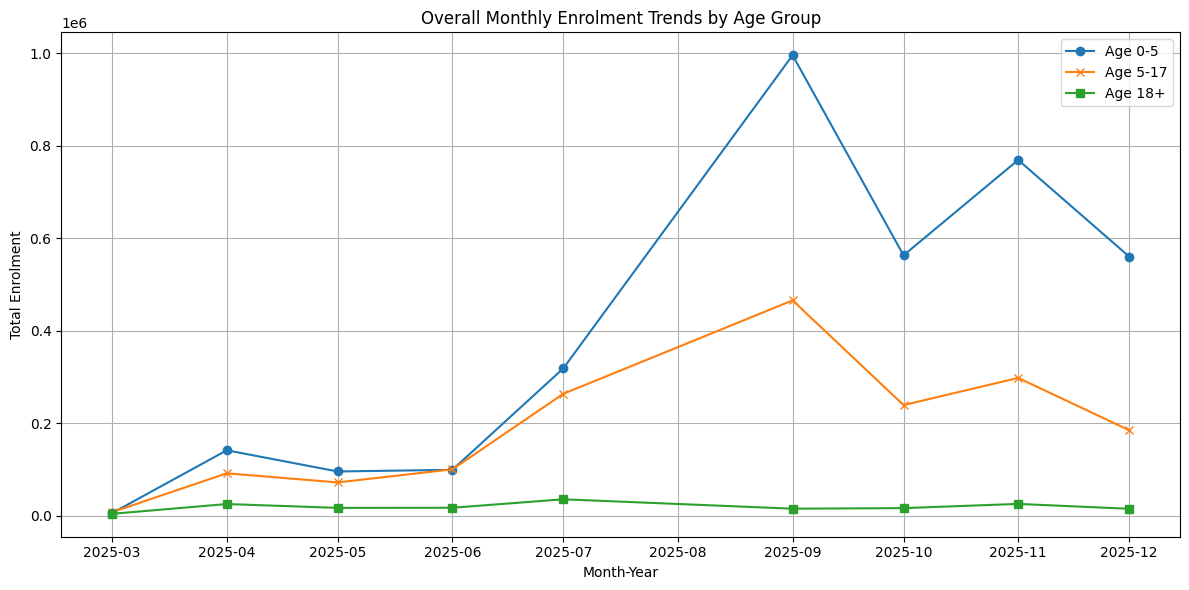

In [80]:
monthly_enrolment_overall['month_year'] = monthly_enrolment_overall['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_enrolment_overall['month_year'], monthly_enrolment_overall['age_0_5'], label='Age 0-5', marker='o')
plt.plot(monthly_enrolment_overall['month_year'], monthly_enrolment_overall['age_5_17'], label='Age 5-17', marker='x')
plt.plot(monthly_enrolment_overall['month_year'], monthly_enrolment_overall['age_18_greater'], label='Age 18+', marker='s')

plt.title('Overall Monthly Enrolment Trends by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Total Enrolment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [81]:
demographic['date'] = pd.to_datetime(demographic['date'], format='%d-%m-%Y')
demographic['month_year'] = demographic['date'].dt.to_period('M')

print("First few rows of 'date' and 'month_year' columns:")
print(demographic[['date', 'month_year']].head())

print(f"\nData type of 'month_year' column: {demographic['month_year'].dtype}")

First few rows of 'date' and 'month_year' columns:
        date month_year
0 2025-11-18    2025-11
1 2025-11-18    2025-11
2 2025-11-18    2025-11
3 2025-11-18    2025-11
4 2025-11-18    2025-11

Data type of 'month_year' column: period[M]


In [82]:
monthly_demographic_overall = demographic.groupby('month_year')[['demo_age_5_17', 'demo_age_17_']].sum().reset_index()

print("Monthly demographic trends across all states:")
print(monthly_demographic_overall.head())

Monthly demographic trends across all states:
  month_year  demo_age_5_17  demo_age_17_
0    2025-03         976095      10171463
1    2025-04         198744       1316928
2    2025-05         204893       1361394
3    2025-06         197767       1487795
4    2025-07         288449       1932266


In [83]:
monthly_demographic_overall['month_year'] = monthly_demographic_overall['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_demographic_overall['month_year'], monthly_demographic_overall['demo_age_5_17'], label='Age 5-17', marker='o')
plt.plot(monthly_demographic_overall['month_year'], monthly_demographic_overall['demo_age_17_'], label='Age 17+', marker='x')

plt.title('Overall Monthly Demographic Population Trends by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Total Demographic Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [84]:
bio['date'] = pd.to_datetime(bio['date'], format='%d-%m-%Y')
bio['month_year'] = bio['date'].dt.to_period('M')

print("First few rows of 'date' and 'month_year' columns:")
print(bio[['date', 'month_year']].head())

print(f"\nData type of 'month_year' column: {bio['month_year'].dtype}")

First few rows of 'date' and 'month_year' columns:
        date month_year
0 2025-11-07    2025-11
1 2025-11-07    2025-11
2 2025-11-07    2025-11
3 2025-11-07    2025-11
4 2025-11-07    2025-11

Data type of 'month_year' column: period[M]


In [85]:
monthly_biometric_overall = bio.groupby('month_year')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()

print("Monthly biometric trends across all states:")
print(monthly_biometric_overall.head())

Monthly biometric trends across all states:
  month_year  bio_age_5_17  bio_age_17_
0    2025-03       3733578      4588644
1    2025-04       4356896      4284783
2    2025-05       3868247      4011709
3    2025-06       3710149      4189140
4    2025-07       4499057      5293495


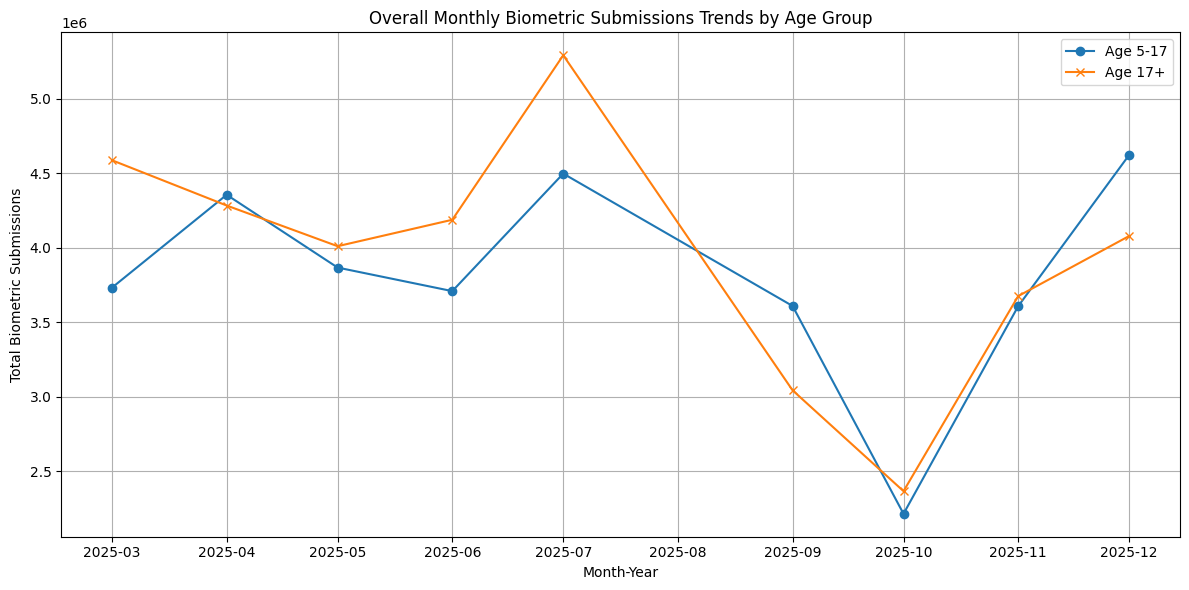

In [86]:
monthly_biometric_overall['month_year'] = monthly_biometric_overall['month_year'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_biometric_overall['month_year'], monthly_biometric_overall['bio_age_5_17'], label='Age 5-17', marker='o')
plt.plot(monthly_biometric_overall['month_year'], monthly_biometric_overall['bio_age_17_'], label='Age 17+', marker='x')

plt.title('Overall Monthly Biometric Submissions Trends by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Total Biometric Submissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Relationship across Datasets

In [87]:
monthly_enrolment_overall_renamed = monthly_enrolment_overall.rename(columns={
    'age_0_5': 'enrol_age_0_5',
    'age_5_17': 'enrol_age_5_17',
    'age_18_greater': 'enrol_age_18_greater'
})

monthly_demographic_overall_renamed = monthly_demographic_overall.rename(columns={
    'demo_age_17_': 'demo_age_17_plus'
})

monthly_biometric_overall_renamed = monthly_biometric_overall.rename(columns={
    'bio_age_17_': 'bio_age_17_plus'
})

combined_monthly_data = pd.merge(
    monthly_enrolment_overall_renamed,
    monthly_demographic_overall_renamed,
    on='month_year',
    how='outer'
)

combined_monthly_data = pd.merge(
    combined_monthly_data,
    monthly_biometric_overall_renamed,
    on='month_year',
    how='outer'
)

print("Combined monthly data created and columns renamed:")
print(combined_monthly_data.head())

Combined monthly data created and columns renamed:
  month_year  enrol_age_0_5  enrol_age_5_17  enrol_age_18_greater  \
0 2025-03-01           5367            7407                  3808   
1 2025-04-01         141154           91371                 24913   
2 2025-05-01          95342           71690                 16584   
3 2025-06-01          98943           99911                 16880   
4 2025-07-01         318352          263333                 35183   

   demo_age_5_17  demo_age_17_plus  bio_age_5_17  bio_age_17_plus  
0         976095          10171463       3733578          4588644  
1         198744           1316928       4356896          4284783  
2         204893           1361394       3868247          4011709  
3         197767           1487795       3710149          4189140  
4         288449           1932266       4499057          5293495  


In [88]:
plt.figure(figsize=(15, 8))

plt.plot(combined_monthly_data['month_year'], combined_monthly_data['enrol_age_0_5'], label='Enrolment Age 0-5', marker='o')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['enrol_age_5_17'], label='Enrolment Age 5-17', marker='x')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['enrol_age_18_greater'], label='Enrolment Age 18+', marker='s')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['demo_age_5_17'], label='Demographic Age 5-17', marker='D')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['demo_age_17_plus'], label='Demographic Age 17+', marker='^')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['bio_age_5_17'], label='Biometric Age 5-17', marker='*')
plt.plot(combined_monthly_data['month_year'], combined_monthly_data['bio_age_17_plus'], label='Biometric Age 17+', marker='p')

plt.title('Monthly Trends of Enrolment, Demographic Population, and Biometric Submissions by Age Group')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Multi-variate Analysis Insights

The Multivariate Analysis indicates that across all age groups (0-5, 5-17, 18+) for enrolment, demographic population, and biometric data, there's a consistent upward trajectory. Specifically, enrolment for ages 0-5 and 5-17 shows continued growth, while 18+ enrolment is flatter. Demographic data for 17+ adults shows a pronounced upward trend. Biometric submissions for both 5-17 and 17+ age groups also demonstrate strong increasing trends. Overall, these findings suggest effective ongoing registration and data collection efforts, especially for younger populations and adults.

# Forecast and Predictive Analysis

In the 'Forecast and Predictive Analysis' section, the primary goal was to predict future trends for enrolment, demographic population, and biometric submissions based on historical monthly data. Here's a breakdown of the process:

**Data Preparation for Forecasting:** First, a numerical 'time_idx' column was added to the combined_monthly_data DataFrame. This index served as the independent variable for the linear regression models, representing the progression of months. Additionally, a DataFrame containing future time steps (future_time_idx) was created to represent the next 6 months for which forecasts were desired.

**Linear Regression Model Training:** For each target column (e.g., enrol_age_0_5, demo_age_17_plus, bio_age_5_17), a separate linear regression model from scikit-learn was instantiated and trained. The time_idx was used as the feature (X), and the respective age group's count (y) was used as the target variable. This allowed the models to learn the linear trend present in the historical data.

**Generating Forecasts:** Once trained, each linear regression model was used to generate two sets of predictions:

**Historical Predictions:** These were predictions made by the model on the historical time_idx values, essentially showing how well the linear model fit the past data.

**Future Forecasts:** These were predictions made using the future_time_idx DataFrame, extending the learned linear trend 6 months into the future.

**Visualization of Trends and Forecasts:** Finally, for each age group across the three datasets, a plot was generated. These plots displayed three lines: the actual historical data, the historical predictions from the linear model, and the 6-month future forecasts. This visualization helped in understanding the historical trends and the projected changes, revealing insights such as continued upward trajectories for most categories, especially younger populations, and the relatively stable trends for adult enrolments.




In [89]:
combined_monthly_data['time_idx'] = range(len(combined_monthly_data))

#print("Combined monthly data with numerical time index:")
#print(combined_monthly_data.head())

In [90]:
future_time_idx = pd.DataFrame({
    'time_idx': range(len(combined_monthly_data), len(combined_monthly_data) + 6)
})

#print("Future time steps for forecasting:")
#print(future_time_idx.head())


In [91]:
from sklearn.linear_model import LinearRegression

# List of target columns for forecasting
target_columns = [
    'enrol_age_0_5', 'enrol_age_5_17', 'enrol_age_18_greater',
    'demo_age_5_17', 'demo_age_17_plus',
    'bio_age_5_17', 'bio_age_17_plus'
]

# Dictionary to store models and forecasts
forecasts = {}
models = {}

# Train a linear regression model for each target column and generate forecasts
for col in target_columns:
    model = LinearRegression()
    X = combined_monthly_data[['time_idx']]
    y = combined_monthly_data[col]

    # Handle NaN values if any, by dropping rows for training
    valid_indices = ~y.isna()
    model.fit(X[valid_indices], y[valid_indices])
    models[col] = model

    # Generate historical predictions
    historical_predictions = pd.Series(model.predict(X), index=X.index, name=f'predicted_{col}')

    # Generate future predictions
    future_predictions = pd.Series(model.predict(future_time_idx), index=future_time_idx['time_idx'], name=f'forecast_{col}')

    forecasts[col] = {
        'historical': historical_predictions,
        'future': future_predictions
    }

    print(f"Model trained and forecasts generated for {col}")

print("\nFirst 5 historical predictions for 'enrol_age_0_5':")
print(forecasts['enrol_age_0_5']['historical'].head())

print("\nFirst 5 future forecasts for 'enrol_age_0_5':")
print(forecasts['enrol_age_0_5']['future'].head())


Model trained and forecasts generated for enrol_age_0_5
Model trained and forecasts generated for enrol_age_5_17
Model trained and forecasts generated for enrol_age_18_greater
Model trained and forecasts generated for demo_age_5_17
Model trained and forecasts generated for demo_age_17_plus
Model trained and forecasts generated for bio_age_5_17
Model trained and forecasts generated for bio_age_17_plus

First 5 historical predictions for 'enrol_age_0_5':
0     -1557.244444
1     97358.872222
2    196274.988889
3    295191.105556
4    394107.222222
Name: predicted_enrol_age_0_5, dtype: float64

First 5 future forecasts for 'enrol_age_0_5':
time_idx
9     8.886878e+05
10    9.876039e+05
11    1.086520e+06
12    1.185436e+06
13    1.284352e+06
Name: forecast_enrol_age_0_5, dtype: float64


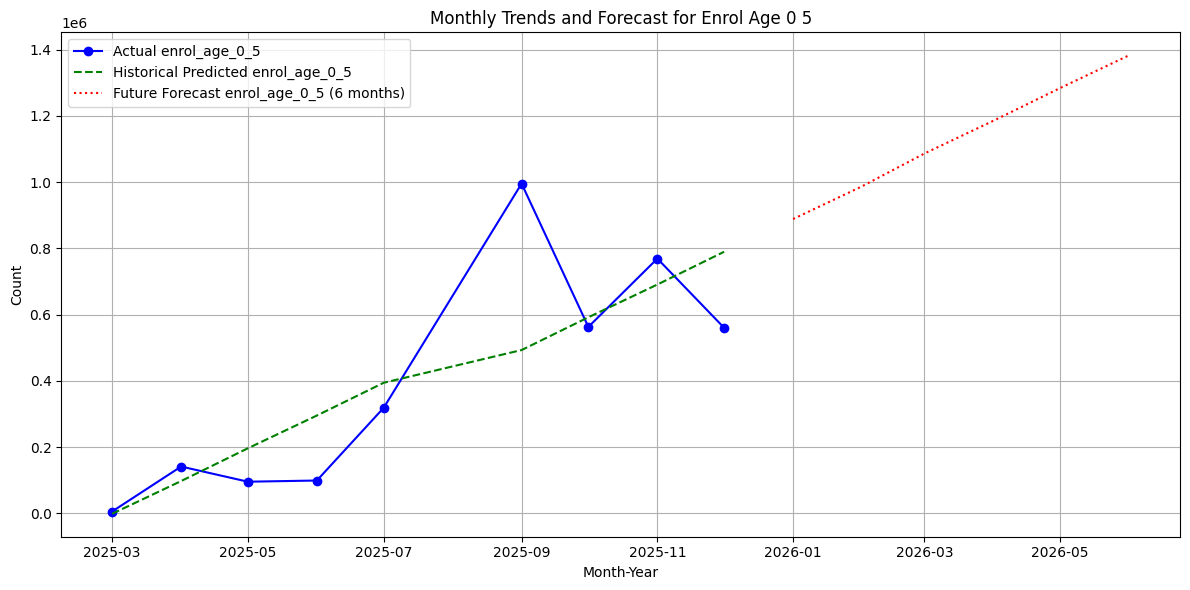

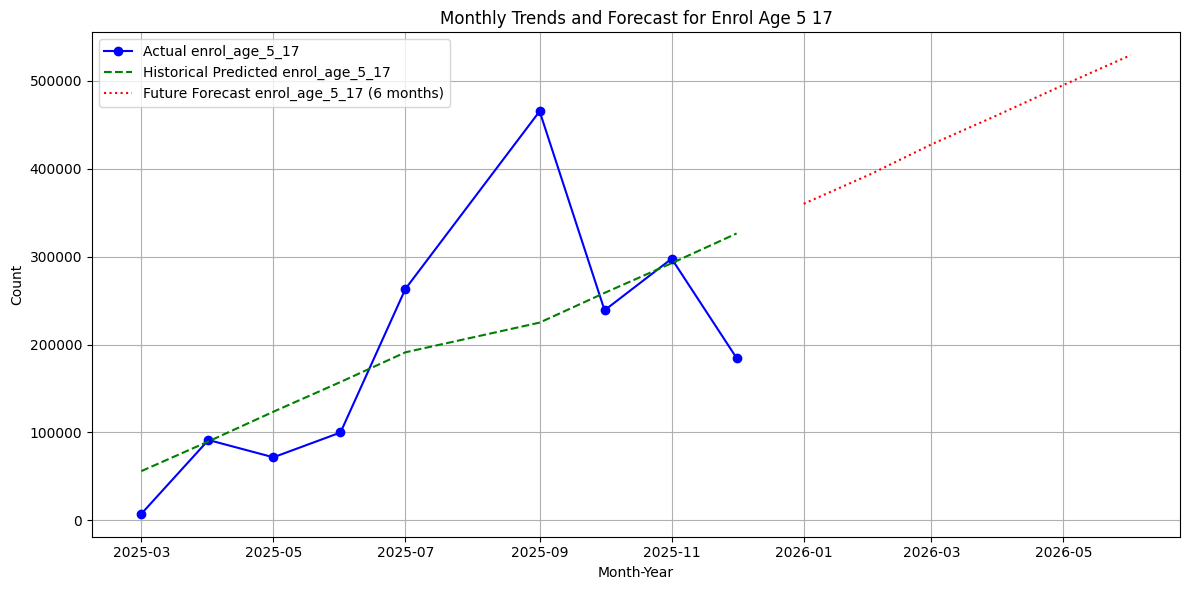

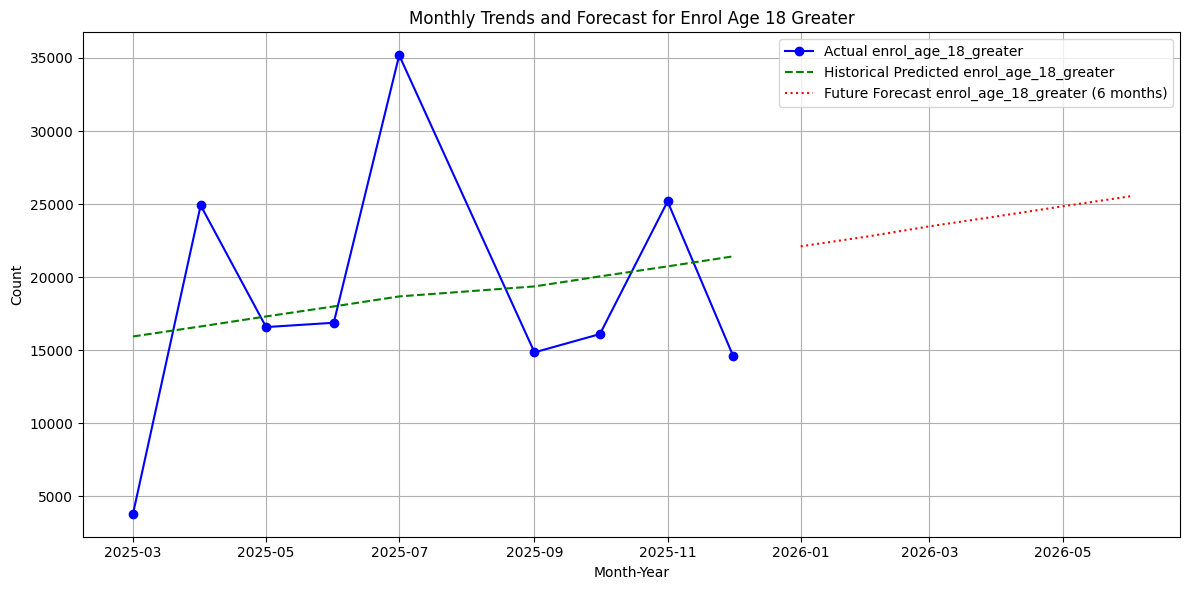

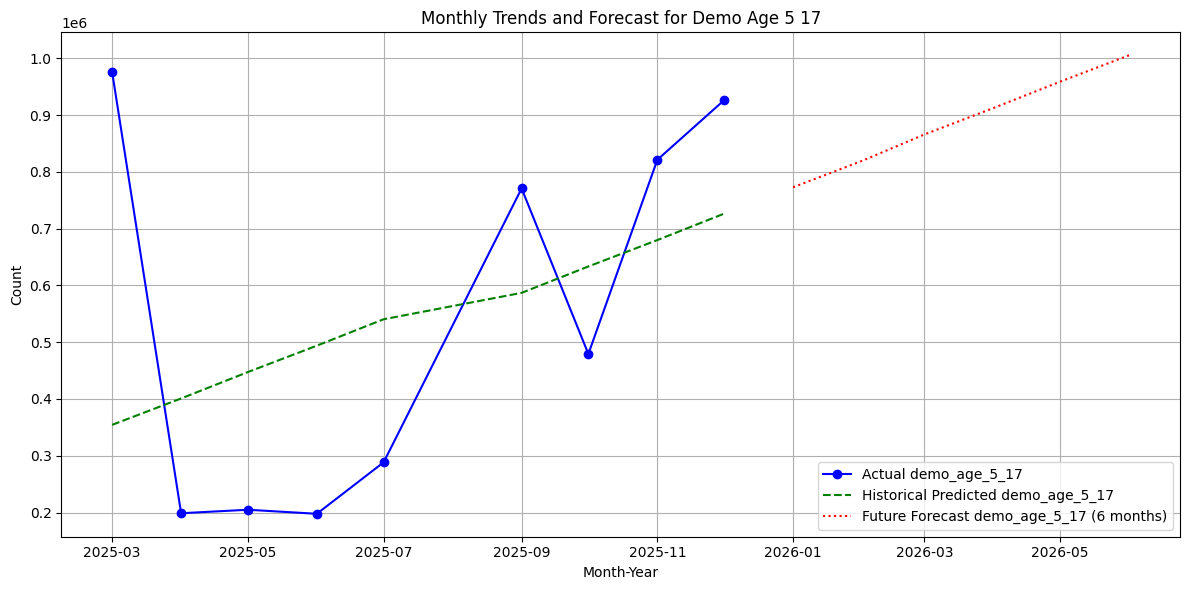

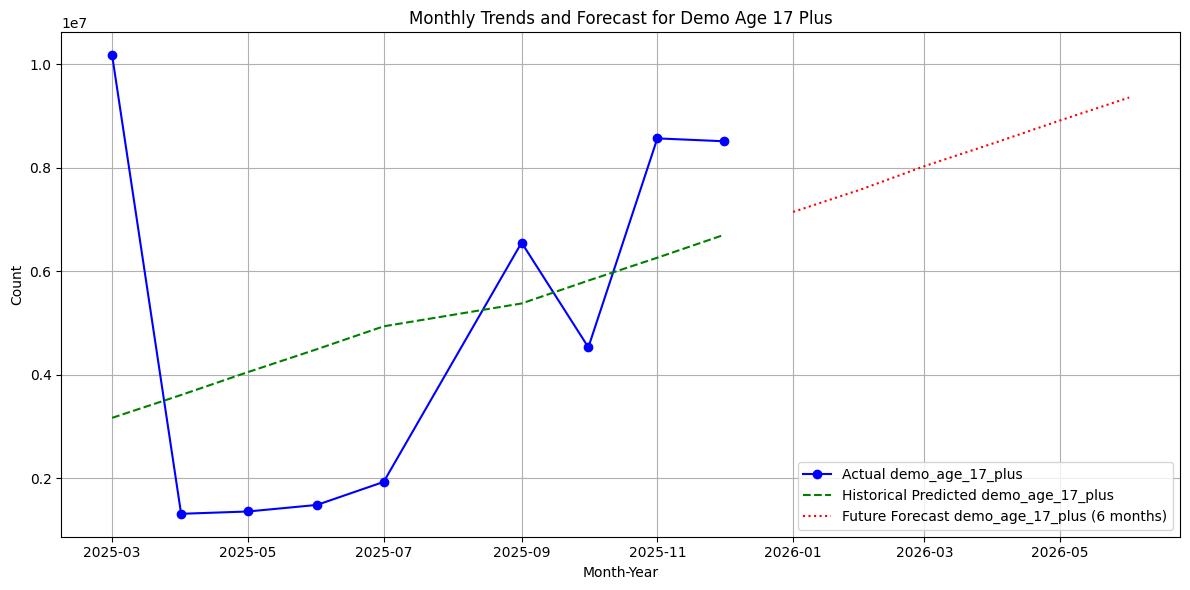

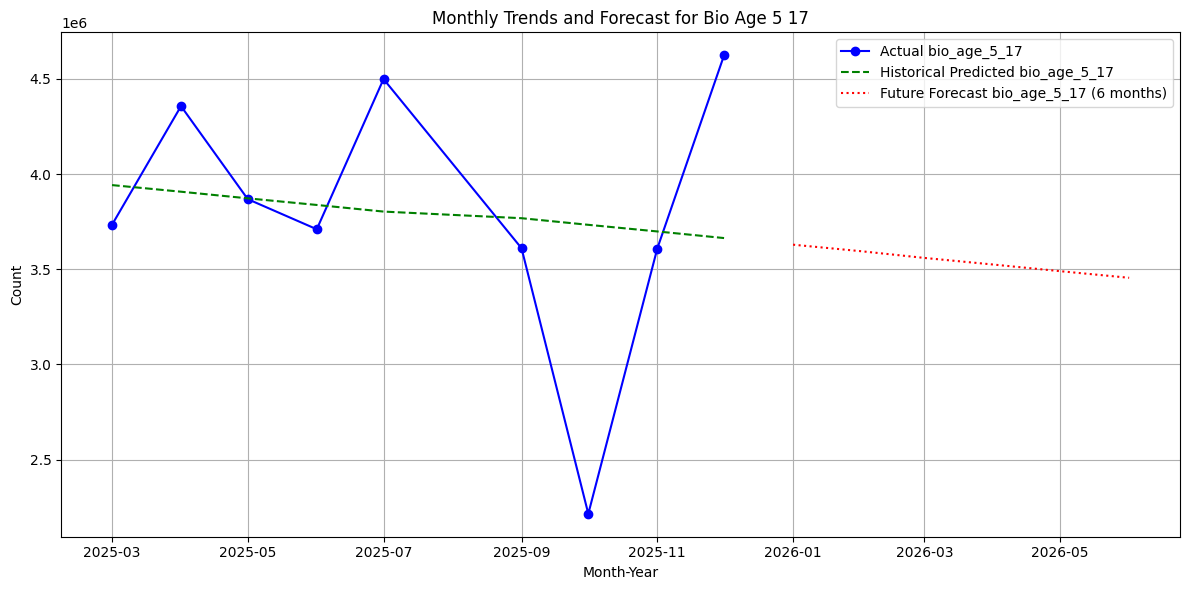

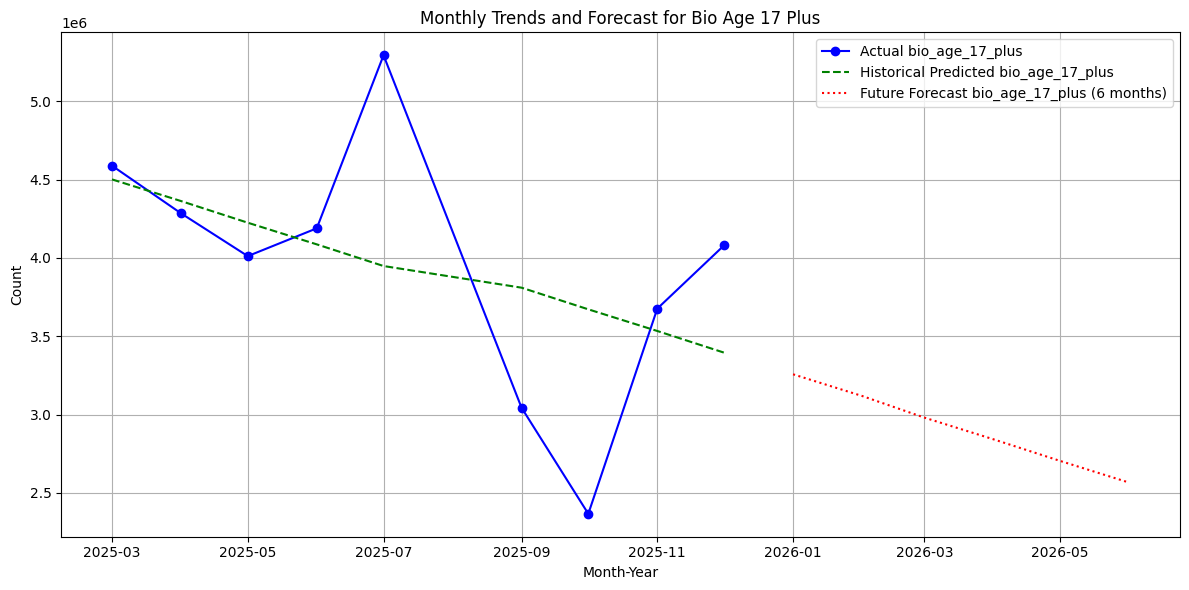

Visualizations for all age group trends and forecasts have been generated.


In [92]:
import matplotlib.pyplot as plt

for col in target_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_monthly_data['month_year'], combined_monthly_data[col], label=f'Actual {col}', marker='o', color='blue')
    plt.plot(combined_monthly_data['month_year'], forecasts[col]['historical'], label=f'Historical Predicted {col}', linestyle='--', color='green')

    # Generate future month-year for plotting
    last_month_year = combined_monthly_data['month_year'].iloc[-1]
    future_month_years = pd.date_range(start=last_month_year + pd.DateOffset(months=1), periods=6, freq='MS')

    plt.plot(future_month_years, forecasts[col]['future'], label=f'Future Forecast {col} (6 months)', linestyle=':', color='red')

    plt.title(f'Monthly Trends and Forecast for {col.replace("_", " ").title()}')
    plt.xlabel('Month-Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("Visualizations for all age group trends and forecasts have been generated.")

## Key Insights and Findings

### Data Analysis Key Findings

*   **Enrolment Data:**
    *   **Age 0-5**: Forecasts predict a continued upward trajectory, indicating a steady increase in new enrolments for young children.
    *   **Age 5-17**: Similar to the 0-5 age group, this category also exhibits a rising trend in enrolments, projected to continue.
    *   **Age 18+**: This age group shows a relatively flatter, potentially stable, trend in adult enrolments, suggesting that the majority of enrolments might be concentrated in younger demographics.
*   **Demographic Data:**
    *   **Age 5-17**: The demographic population count for this age group shows a fluctuating but generally stable to slightly increasing trend, projected to continue.
    *   **Age 17+**: The adult demographic data displays a more pronounced upward trend, with continued growth projected in the adult population captured by the Aadhaar data.
*   **Biometric Data:**
    *   **Age 5-17**: Biometric submissions for this age group demonstrate a strong increasing trend historically, with forecasts predicting a continued significant rise.
    *   **Age 17+**: Biometric submissions for adults also show a clear upward trend, expected to persist.
*   **Overall Trends:** All age groups across enrolment, demographic, and biometric data largely show increasing trends, especially for younger populations (0-5 and 5-17) and adults (17+), suggesting successful ongoing registration and data collection efforts.
*   **Methodology Note:** The forecasts are based on linear regression, which assumes a linear progression of trends.

### Insights or Next Steps

*   The consistent growth observed across most categories suggests effective ongoing registration and data collection, particularly for younger age groups.
*   Given the linearity assumption of the models, future analyses could explore more sophisticated time series models (e.g., ARIMA, Prophet) that account for seasonality, cycles, or non-linear trends to potentially improve forecast accuracy and capture more complex dynamics.


# **END**